# Comprehensive Exploratory Data Analysis

## Objectives
1. Understand what EDA is 
2. Why do EDA and where does EDA fit in your data analysis pipeline
3. Undertake EDA 
4. Learn to write custom functions and why
5. Learn to debug and deal with 'error messages'. 

### Break it down into 3 core skills
> Statistical Theory (doesnt need a computer)
> How to code (need a computer)
> Project management (to ensure your workflow is efficient, reproducible and trouble-shoot-able and that your code is clean)

## 1. What is an EDA and Why do them?
- Exploratory Data Analysis [EDA] is one of the most crucial and important step in undertaking data analysis or statistical modelling. 
- EDA and Preprocessing affects model output **significantly**
- Garbage in -> Garbage out. 

- There is no set way to undertake EDA. 
- Essentially, EDA should allow you to familiarise yourself with the dataset and inform decisions in modelling in a **reproducible** manner.

- You have to follow the principles of being a good scientist; formulate a research question, analyse and be able to reproduce results.
- EDA should be conducted in an open-soruce(Python/R) environment with as transparent a manner as possible to allow **reproducibility**.

- In future, your EDA /'scratch book' may need to be submitted alongside scientific manuscript / paper. 
- Important, also in **industry** to convince other departments, your boss about *why* your model works and how to be able to **replicate** your findings. 

## 2. Where does it fit in a pipeline

- EDA should happen after 'train' , 'test' split but it is okay to do it on whole data. [**JARGON**What is a train /test split?]
- Anticipate EDA to take 60 to 80% of your analysis time. 
- EDA and Data Wrangling can 'coexist' and EDA should inform model choices and wrangling (**JARGON** e.g., feature engineering) choices.
- EDA should have as minimal model as possible. 
- EDA should link with primary, secondary and ternary research questions and should reflect that. 
- EDA is not a formal process.

## 3. How to EDA

- Anatomy of a python script by Melanie Walsh (Link)[https://melaniewalsh.github.io/Intro-Cultural-Analytics/02-Python/03-Anatomy-Python-Script.html]
- Import libraries, Define custom functions, Define file paths, Assign variables, Constants, Read in File, Manipulate, Write output or inferences. 
- Qustions and Insights from EDA should be deliberately and clearly marked.
- Literate Programming tools (literate programming simply means combining text and code) such as Jupyter notebooks, colabs, quarto markdown files are very useful. 
- [Hadley Wickham on R](https://r4ds.had.co.nz/exploratory-data-analysis.html)


## EDA 

### Purpose
- understand this dataset and help plan modelling
- Source data link (https://zenodo.org/records/7554815#.ZF-dztLMK-Y) [Bacteremia dataset]
- Thanks to original authour Heinze, Georg
- The original study (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0106765)[Original journal article in PLOS One 2014]
- Study metadata : 'retrospective' 'cohort' study, 
- Goal: to identify or build predictive model that can predict bacteremia in suspected patient population. 
- Blood culture false positive rates are high and also, have an important economic cost. 
- 20% increase of total hospital costs for false positive blood culture results.
- Methodology: all patients with suspected blood culture positivity and having a blood culture were included. 


### Analyst Questions
?? 

### Insights
??

## Initial Housekeeping

- You load the necessary data 
- You load the necessary packages
- If you write custom functions, they can sit here too
- You can come back and run this particular 'code block' or 'cell'
- This (mixture of 'code' and 'markdown text') is called 'literate programming'
- You should try and comment code because if you read back, you can understand what is happening. 

In [1]:
# libraries
import pandas as pd #main library to use dataframe 
import matplotlib.pyplot as plt  # plotting library
import seaborn as sns  # high level plotting library of matplotlib 
import missingno as msno #missing data package 
import numpy as np #numerical package in python, which pandas is built on 
import random #built in random module 

from sklearn.feature_selection import VarianceThreshold # what do you notice the difference from this line of code? 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage #scientific python package 
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist

# set global properties
plt.rcParams['figure.dpi'] = 250

In [2]:
# Custom functions

def check_high_corr(df,threshold = 0.7):
    # compute correlation matrix and return them after removing duplicates.
    cm = df.corr().abs()
    # unstack
    cm_unstack = cm.unstack()
    hi_corr = cm_unstack[cm_unstack > threshold]
    # remove self corr 
    hi_corr = hi_corr[hi_corr != 1]
    # remove duplicates
    hi_corr = hi_corr.drop_duplicates()
    return hi_corr


In [3]:
# Custom functions

def low_vars(df,threshold = 0.0):
    # load sklearn var threshold function and use a custom set threshold

    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df)
    # select variances
    vars = selector.variances_
    # create new df with their variances
    var_df = pd.DataFrame({
        'Column':df.columns,
        'Variance':vars
    })
    # subset low vars
    low_vars = var_df[var_df['Variance']<= threshold]
    return low_vars


    

In [4]:
def plot_dendrogram(model, **kwargs):

# create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else: 
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_,counts]
    ).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

In [5]:
# Load data
bacdic = pd.read_csv('https://zenodo.org/records/7554815/files/bacteremia-DataDictionary.csv?download=1')
df = pd.read_csv('https://zenodo.org/records/7554815/files/Bacteremia_public_S2.csv?download=1')


# df = pd.read_csv('../data/raw/Bacteremia_public_S2.csv')
# df variable on LHS is assigned the output of a function call 'pd.read_csv'
# pd is the same as calling pandas.read_csv or in more human speak, its the same as telling python 'from pandas library' please iuse function read_csv and then you have to supply an argument to the function
# argument is 'location' of the data. location is a string. so you supply that
# bacdic = pd.read_csv('../data/raw/bacteremia-DataDictionary.csv')

## Start with basic EDA

- Now lets try to understand our data.
- No using excel ! (sometimes we have to but try not to do it! and hopefully this dataset discourage you to do because it is quite big.)

In [6]:
# Lets check data is loaded.

df.info()

# now this is calling a method. 
# df is an pandas dataframe object that has a name 'df'. 
# this object has many methods. 
# the method we are calling it is called 'info' and this executes and outputs it.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14691 entries, 0 to 14690
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            14691 non-null  int64  
 1   SEX           14691 non-null  int64  
 2   AGE           14691 non-null  int64  
 3   MCV           14649 non-null  float64
 4   HGB           14650 non-null  float64
 5   HCT           14649 non-null  float64
 6   PLT           14649 non-null  float64
 7   MCH           14649 non-null  float64
 8   MCHC          14649 non-null  float64
 9   RDW           14635 non-null  float64
 10  MPV           13989 non-null  float64
 11  LYM           14429 non-null  float64
 12  MONO          14445 non-null  float64
 13  EOS           14556 non-null  float64
 14  BASO          14545 non-null  float64
 15  NT            12224 non-null  float64
 16  APTT          12142 non-null  float64
 17  FIB           12124 non-null  float64
 18  SODIUM        13409 non-nu

### Explanation

As you can see, df.info() tell us a lot of info. **what can you see** 

What else do you want to know?


In [7]:
df.shape
# notice the difference. What is df.shape doesnt have()

(14691, 53)

### Python: Object-oriented programming (OOP)

- Object oriented programming means 'objects' i.e., python objects come first.
- Functional programming means 'functions' i.e., actions 
- You dont need to know too much detail. In brief, if you want to set up a 'restaurant business'. 
- OOP will mean you hire 'chef', 'waiter' etc. Functional programming means you build a 'recipe'. 

- OOP - object exist and then you attach properties and functions called 'methods'.
- In python, this is called 'class'. Class is a python object that encapsulates 'functions' called 'methods' and its properties called 'attributes'. 

- To open a restuarant, you need 'waiters'. 
- So you create a 'Waiter' class in Python.
- Waiter is a front-of-house staff so you can define this as an attribute e.g., Waiter.type = 'front of staff' 
- Waiter's job(aka function) is to take orders to kitchen and return the meals to customer. So, you can define a function called 'take_orders' for Watier Class. or you define a function called 'generate_bill' to sum the costs and charge the customer. 
- So now you have a 'template' for in python jargon, class of Waiter. 
- To use them, you need to create a waiter object from the class you have written called 'Waiter'. In python, this is called 'instantiating a class' 

> today_waiter = Waiter() #variable today_waiter is 'instantiated' from a class Waiter.
> today_waiter.type #what do you think this code will generate? note it is called an attribute of today_waiter variable which is a python object of class Waiter. Because you are not askign it to do / or to function, you dont supply ().
> 'front of staff. 
> today_waiter.take_orders() # Here you are asking 'today_waiter' object to do something i.e., take order,so it is a function called, hence parenthesis and you also need to supply an argument today_waiter.take_orders('fries')
> today_watier.generate_bill() #here you are aasking today_waiter to give you a bill. The genearte_bill function doesnt take argument because it is based on what you order. 

- For detail, read python docs on [Class](https://docs.python.org/3/tutorial/classes.html)

### Going back to our task

> df.shape 
- this code is asking python to show us the 'attribute' of an object called 'df' which is an instance of Python pandas dataframe class.
> df.info()
- this code is asking python to execute a function called 'info()' which is a method of an object called 'df' which is an instance of Python pandas dataframe class.

### Data Types

What data types are there in real-life?

What are the pandas data types?

### Answer

> Numbers: ['Integer', 'Complex Number','Float']
> Strings
> Booleans
> Categorical: ['Unordered', 'Ordered']

### Pandas

> object (=string)
> int64 (=python integer)
> float64 (=python float)
> bool (=python Boolean)
> datetime (=python string)
> category (=python string)



#### 
Answer : shape is a tuple (). meaning it is an 'immutable' object in python.
- you are not calling shape() function. You are askign to view the 'attribute' of the dataframe df object.
- info() you are calling a function.
- lets have a look together
[Link to pandas website info function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)

In [7]:
# lets  confirm data types 

df.dtypes



ID                int64
SEX               int64
AGE               int64
MCV             float64
HGB             float64
HCT             float64
PLT             float64
MCH             float64
MCHC            float64
RDW             float64
MPV             float64
LYM             float64
MONO            float64
EOS             float64
BASO            float64
NT              float64
APTT            float64
FIB             float64
SODIUM          float64
POTASS          float64
CA              float64
PHOS            float64
MG              float64
CREA            float64
BUN             float64
HS              float64
GBIL            float64
TP              float64
ALB             float64
AMY             float64
PAMY            float64
LIP             float64
CHE             float64
AP              float64
ASAT            float64
ALAT            float64
GGT             float64
LDH             float64
CK              float64
GLU             float64
TRIG            float64
CHOL            

In [8]:
# lets look at it
df.head()


ID  SEX  AGE   MCV   HGB   HCT    PLT   MCH  MCHC   RDW  ...     BASOR  \
0   1    2   62  99.3  11.5  35.9  307.0  31.5  31.8  19.5  ...  0.413223   
1   3    1   72  85.1  10.3  34.7  182.0  26.0  30.6  15.0  ...  0.000000   
2   5    1   46  96.3   7.4  22.8   64.0  31.2  32.4  19.7  ...  0.568182   
3   7    1   84  91.3  10.3  31.1  309.0  30.4  33.3  13.8  ...  0.000000   
4   9    2   38  85.1  13.7  38.7  183.0  30.2  35.3  12.6  ...  0.000000   

       EOSR       LYMR     MONOR   NEU       NEUR   PDW  RBC    WBC  \
0  0.000000   1.652893  7.024793  22.0  90.909091  10.6  3.7  24.10   
1  0.826446   3.305785  1.652893  11.4  94.214876  11.4  3.9  12.17   
2  0.568182   8.522727  6.818182  14.7  83.522727  14.1  2.5  17.45   
3  0.000000  11.016949  6.779661   9.7  82.203390   8.7  3.5  11.58   
4  0.000000   8.333333  4.166667   8.4  87.500000  12.2  4.4   9.86   

   BloodCulture  
0            no  
1            no  
2            no  
3            no  
4            no  

[5 rows x 53 columns]

In [9]:
# bacdict
bacdic.info()
bacdic.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            53 non-null     int64 
 1   VariableNr            53 non-null     int64 
 2   Variable              53 non-null     object
 3   Label                 53 non-null     object
 4   Scale.of.measurement  53 non-null     object
 5   Units                 53 non-null     object
 6   Remark                4 non-null      object
 7   From.paper            51 non-null     object
dtypes: int64(2), object(6)
memory usage: 3.4+ KB


Unnamed: 0  VariableNr Variable                 Label Scale.of.measurement  \
0           1          36     ALAT   Alanin transaminase           continuous   
1           2          29      ALB               Albumin           continuous   
2           3           3      AGE           Patient Age           continuous   
3           4          30      AMY               Amylase           continuous   
4           5          34       AP  Alkaline phosphatase           continuous   

   Units            Remark                                         From.paper  
0    U/L               NaN     Age 15,985 58 (42?69) 65 (53?74) ,0.0001 0.611  
1    G/L               NaN  ALAT (U/L) 14,919 26 (16?47) 30 (18?60) ,0.000...  
2  years  Alter=German age  Albumin (G/L) 14,187 33.7 (28?39.3) 32 (26.925...  
3    U/L               NaN  Amylase (U/L) 11,783 50 (34?77) 44 (28?70) ,0....  
4    U/L               NaN  ALP (U/L) 14,479 83 (62?120) 100 (72?164) ,0.0...

In [10]:
bacdic.tail()


Unnamed: 0  VariableNr Variable                              Label  \
48          49          10      RDW  Red blood cell distribution width   
49          50           2      SEX                        Patient sex   
50          51          28       TP                      Total protein   
51          52          41     TRIG                       Triclyceride   
52          53          52      WBC                  White blood count   

   Scale.of.measurement             Units Remark  \
48           continuous                 %    NaN   
49              nominal  1=male, 2=female    NaN   
50           continuous               G/L    NaN   
51           continuous             mg/dl    NaN   
52           continuous               G/L    NaN   

                                           From.paper  
48  RDW (%) 15,924 14.4 (13.3?15.925) 14.9 (13.7?1...  
49                                       Female: Male  
50  TP (G/L) 14,301 65.8 (56.8?73.4) 64.7 (56.4?71...  
51  Triglyceride (mg/dl) 10,549 115 (83?164) 118 (...  
52  WBC (G/L) 15,477 9.58 (6.64?13.46) 10.205 (6.6...

In [11]:
dtcols = df.select_dtypes(include=['datetime'])
print(dtcols)
# no date time columns

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[14691 rows x 0 columns]


In [12]:
numcols = df.select_dtypes(include=['float'])
numcols = list(numcols.columns)
print(numcols)

catcols = df.select_dtypes(include=['object'])
catcols = list(catcols)
print(catcols)

# 1 categorical column 
# many numeric i.e., float columns. 

['MCV', 'HGB', 'HCT', 'PLT', 'MCH', 'MCHC', 'RDW', 'MPV', 'LYM', 'MONO', 'EOS', 'BASO', 'NT', 'APTT', 'FIB', 'SODIUM', 'POTASS', 'CA', 'PHOS', 'MG', 'CREA', 'BUN', 'HS', 'GBIL', 'TP', 'ALB', 'AMY', 'PAMY', 'LIP', 'CHE', 'AP', 'ASAT', 'ALAT', 'GGT', 'LDH', 'CK', 'GLU', 'TRIG', 'CHOL', 'CRP', 'BASOR', 'EOSR', 'LYMR', 'MONOR', 'NEU', 'NEUR', 'PDW', 'RBC', 'WBC']
['BloodCulture']


### Insights

Here it tell us the female and male and how they are coded. 

##  Now lets look at missing data and duplicate and unique values for each column.


In [13]:
# Duplicated values
df.duplicated().sum()
# are you sure this is checking on every single column? and can it manage categorical variables?
# also do you undersatnd how this code is being executed?
# > df has duplicated method applied, which results in 'boolean' true false and then, boolean true = 1 so simply summed.

0

In [14]:
# How about unique

df.nunique() # what do yo think about this? 

ID              14691
SEX                 2
AGE                85
MCV               506
HGB               157
HCT               404
PLT               718
MCH               232
MCHC              124
RDW               173
MPV                71
LYM               114
MONO               67
EOS                36
BASO               18
NT                149
APTT              631
FIB              1084
SODIUM             58
POTASS            408
CA                185
PHOS              306
MG                146
CREA              674
BUN               947
HS                169
GBIL              885
TP                649
ALB               401
AMY               488
PAMY              280
LIP               444
CHE               997
AP                672
ASAT              650
ALAT              578
GGT               858
LDH              1137
CK               1506
GLU               389
TRIG              538
CHOL              339
CRP              3328
BASOR             419
EOSR              927
LYMR      

# 
(https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)[Pandas source code] 

- Refresh python boolean logic; True or False (not true = False, not False = True)
- But in Python, these are also False 
-- None 
-- 0 or decimal(0)
-- "" (empty sequence)

# Panda and Null value 
- Pandas is built on top of numpy and NA value in numpy is numpy.nan
- Note that if you read data into pandas, it will coerced into numpy data types.
- NaT will be denoted for time data. 
- <NA> for string and boolean data. 
- If you want to make and or mark, use None
- and note pd.NA == pd.NA results in NA 
- 

In [15]:
# What are the missing data here

df.isnull().sum() 
# seems quite a lot.

ID                 0
SEX                0
AGE                0
MCV               42
HGB               41
HCT               42
PLT               42
MCH               42
MCHC              42
RDW               56
MPV              702
LYM              262
MONO             246
EOS              135
BASO             146
NT              2467
APTT            2549
FIB             2567
SODIUM          1282
POTASS          2008
CA              1276
PHOS            1242
MG              1869
CREA             159
BUN              172
HS              3061
GBIL            1441
TP              1583
ALB             1676
AMY             3913
PAMY            7114
LIP             3699
CHE             2447
AP              1400
ASAT            1154
ALAT             987
GGT             1262
LDH             1714
CK              2080
GLU             4192
TRIG            5061
CHOL            5045
CRP              155
BASOR            732
EOSR             732
LYMR             732
MONOR            732
NEU          

In [16]:
# Now lets look at the missing data 
df.isnull().values.sum()
#quite alot 

71786

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

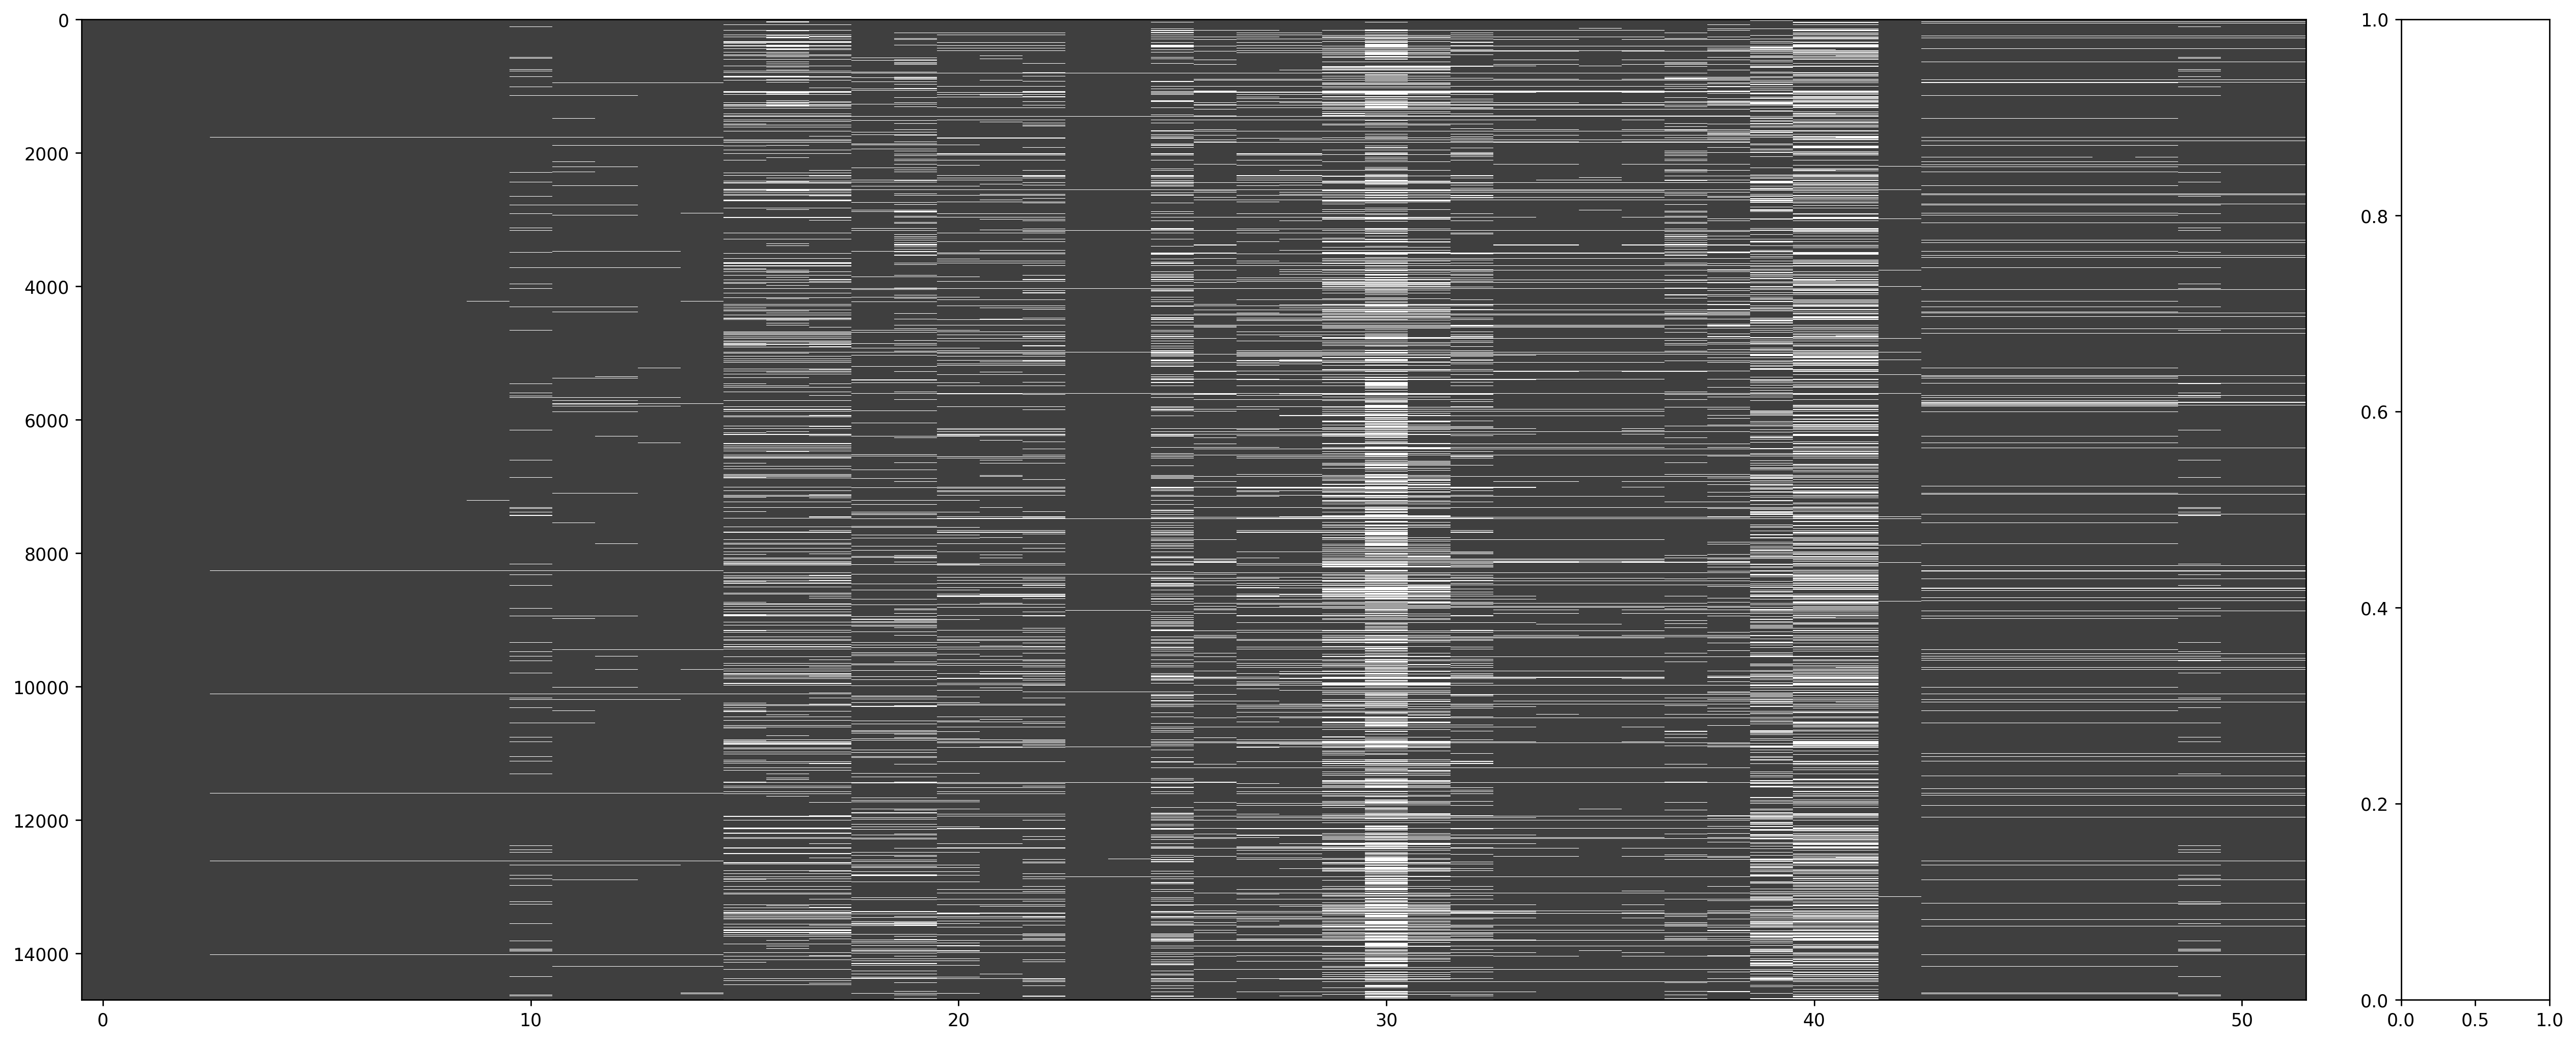

In [17]:
# is missing number more prevalent in some groups over others?

msno.matrix(df.select_dtypes(include = ['number']))

## Oh no

What's all this?
What do we do ?

This is a typical error message
Let's read through them and try to understand what is happening. 

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

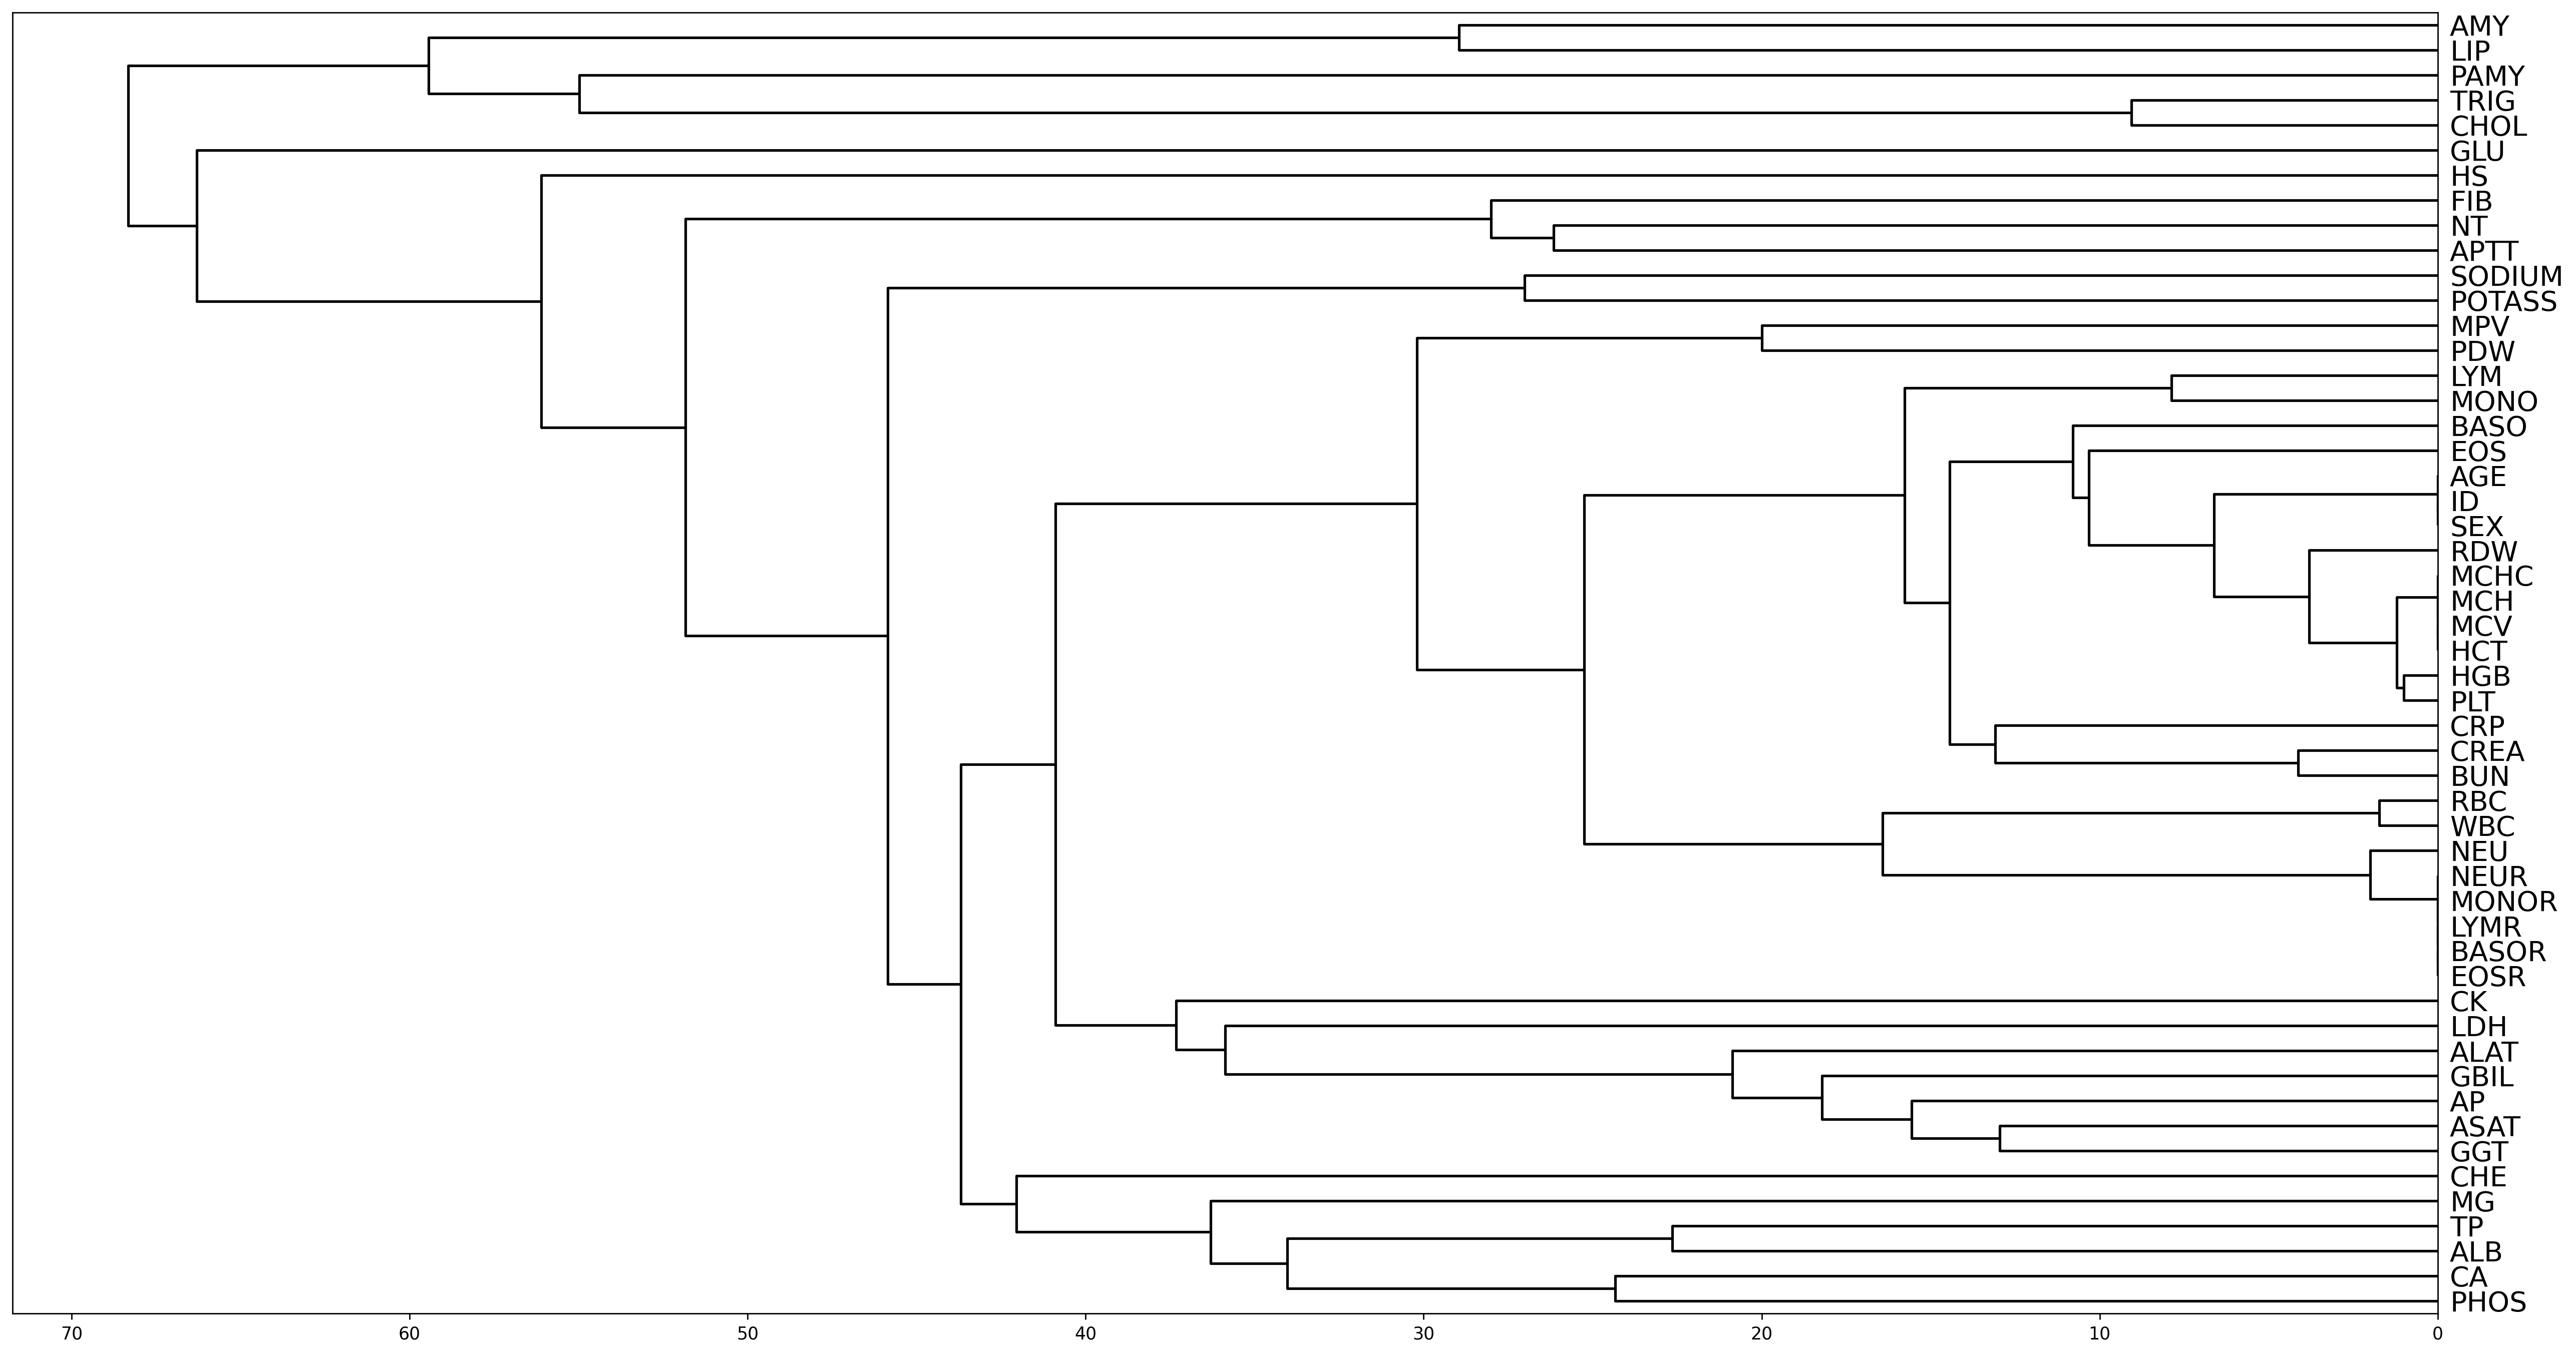

In [18]:
msno.dendrogram(df.select_dtypes(include=['number']))

/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

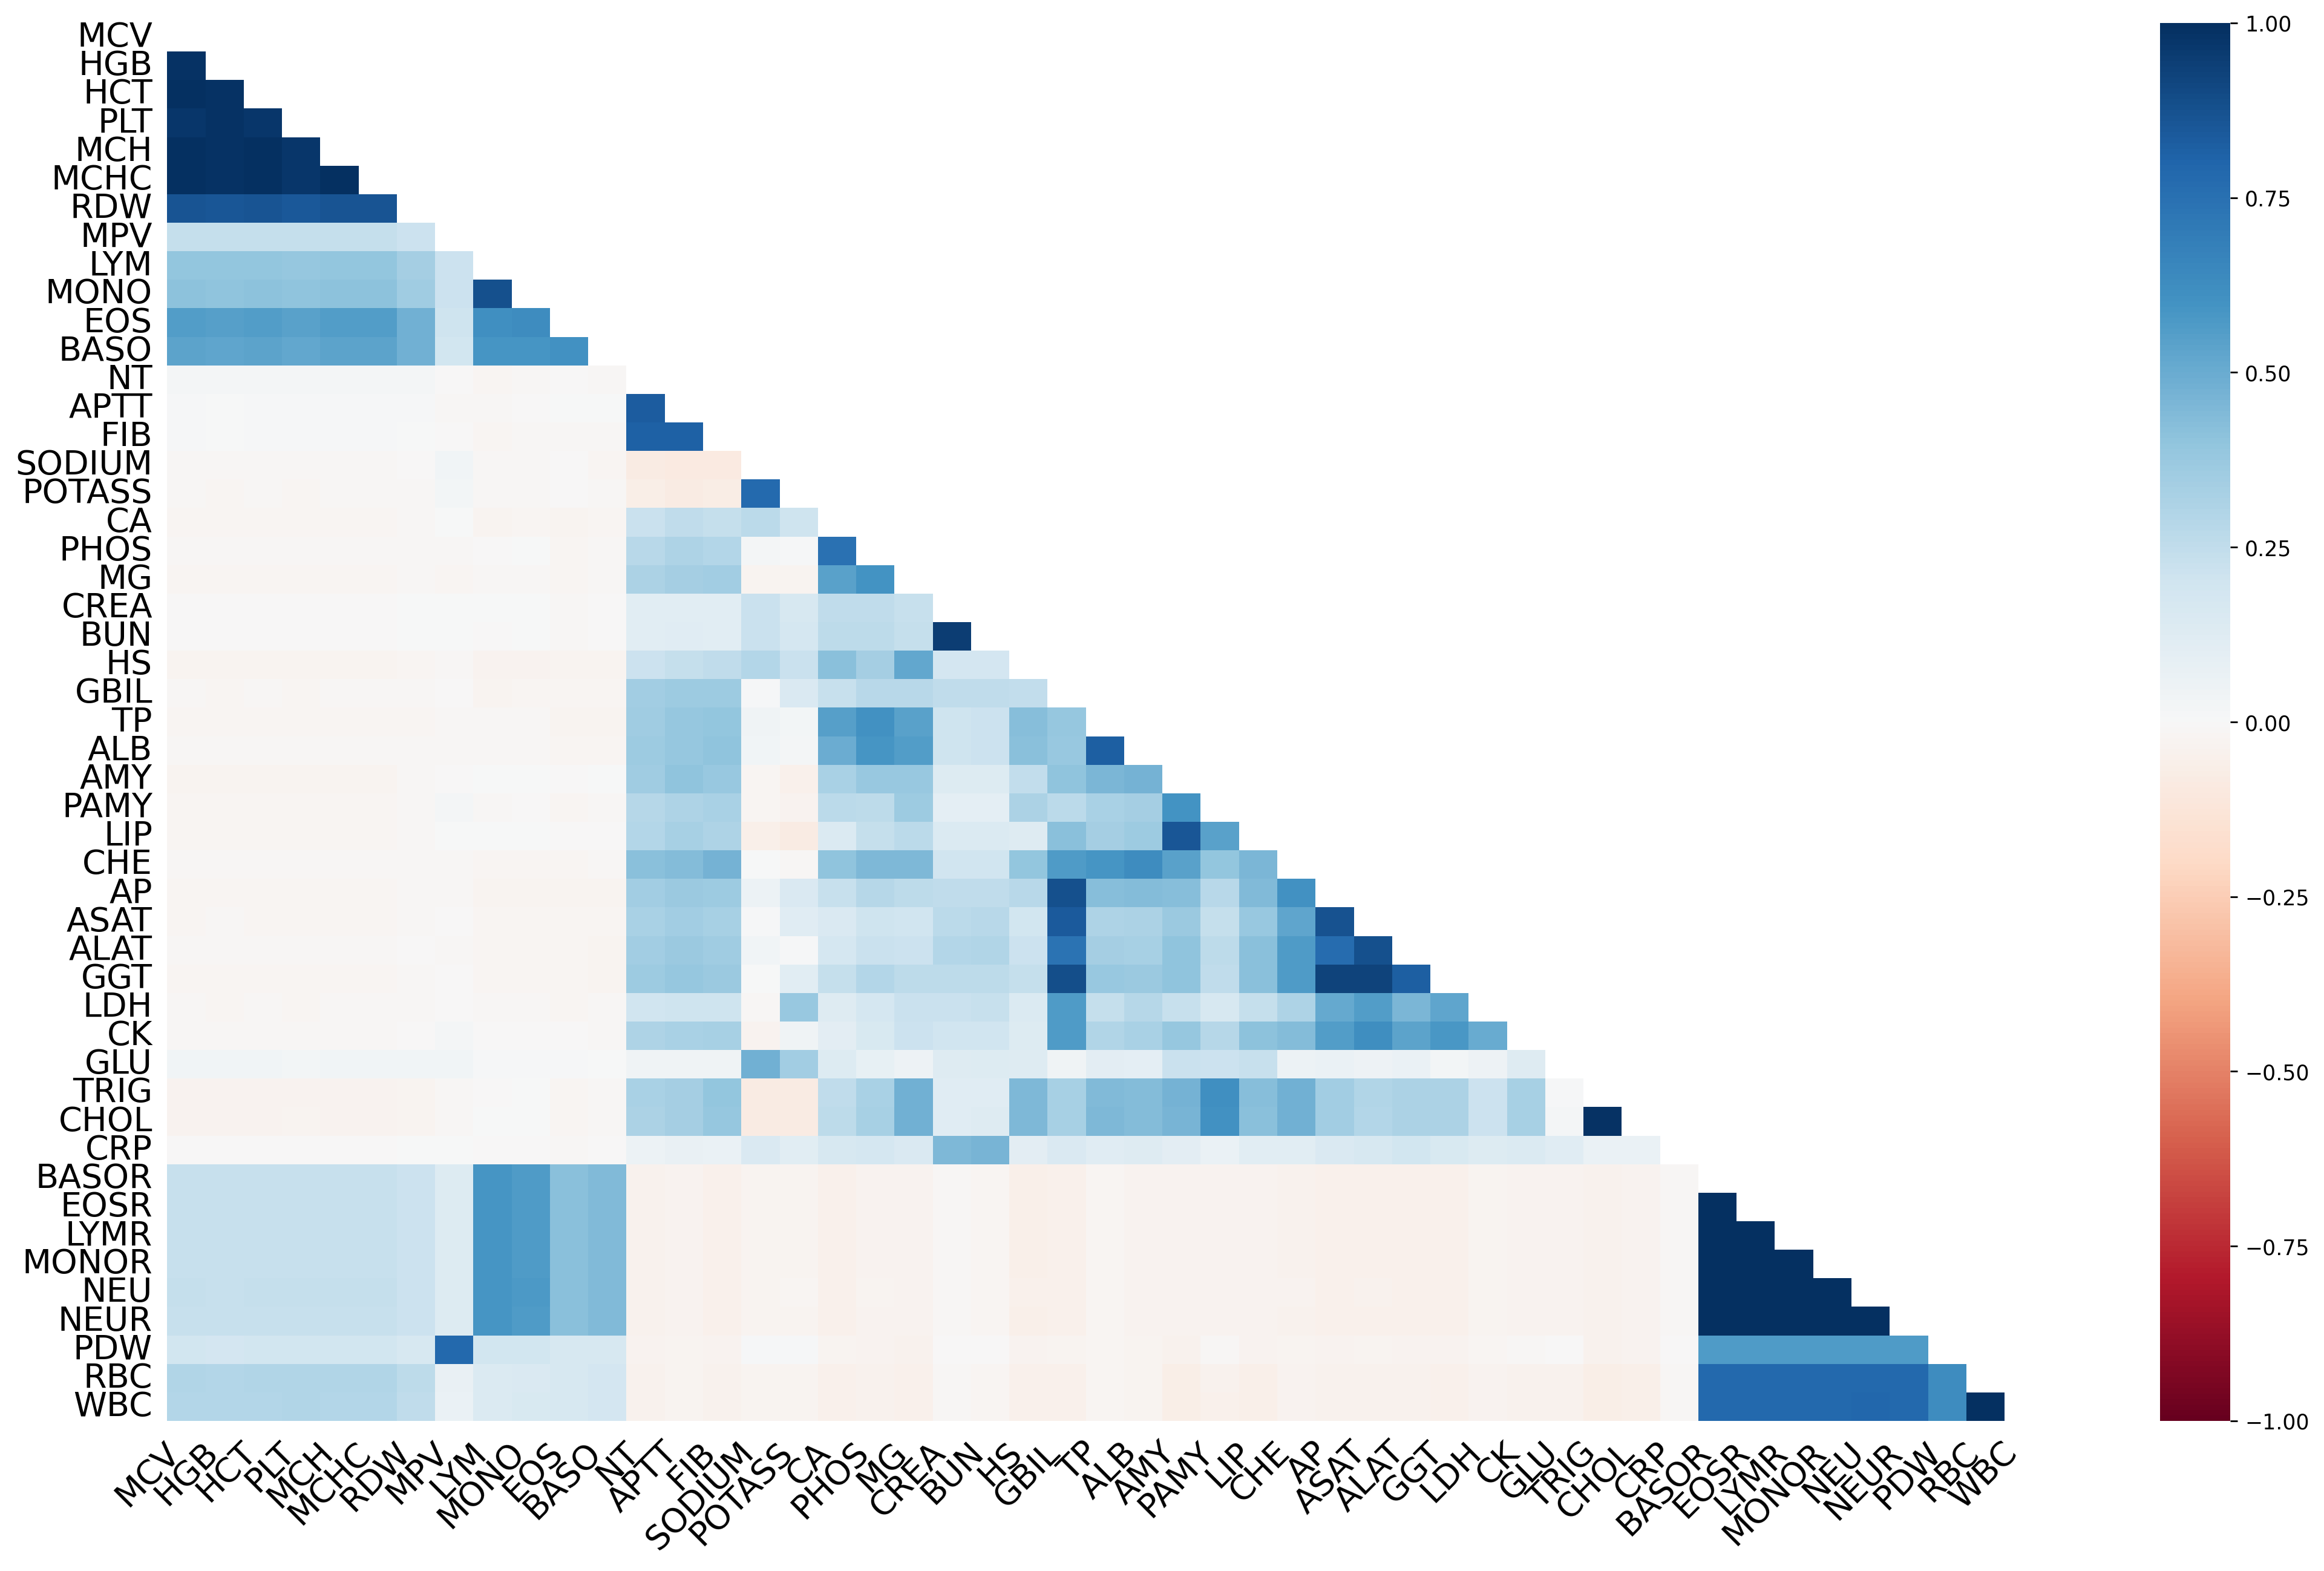

In [19]:
msno.heatmap(df.select_dtypes(include=['number']))

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of labels (52).

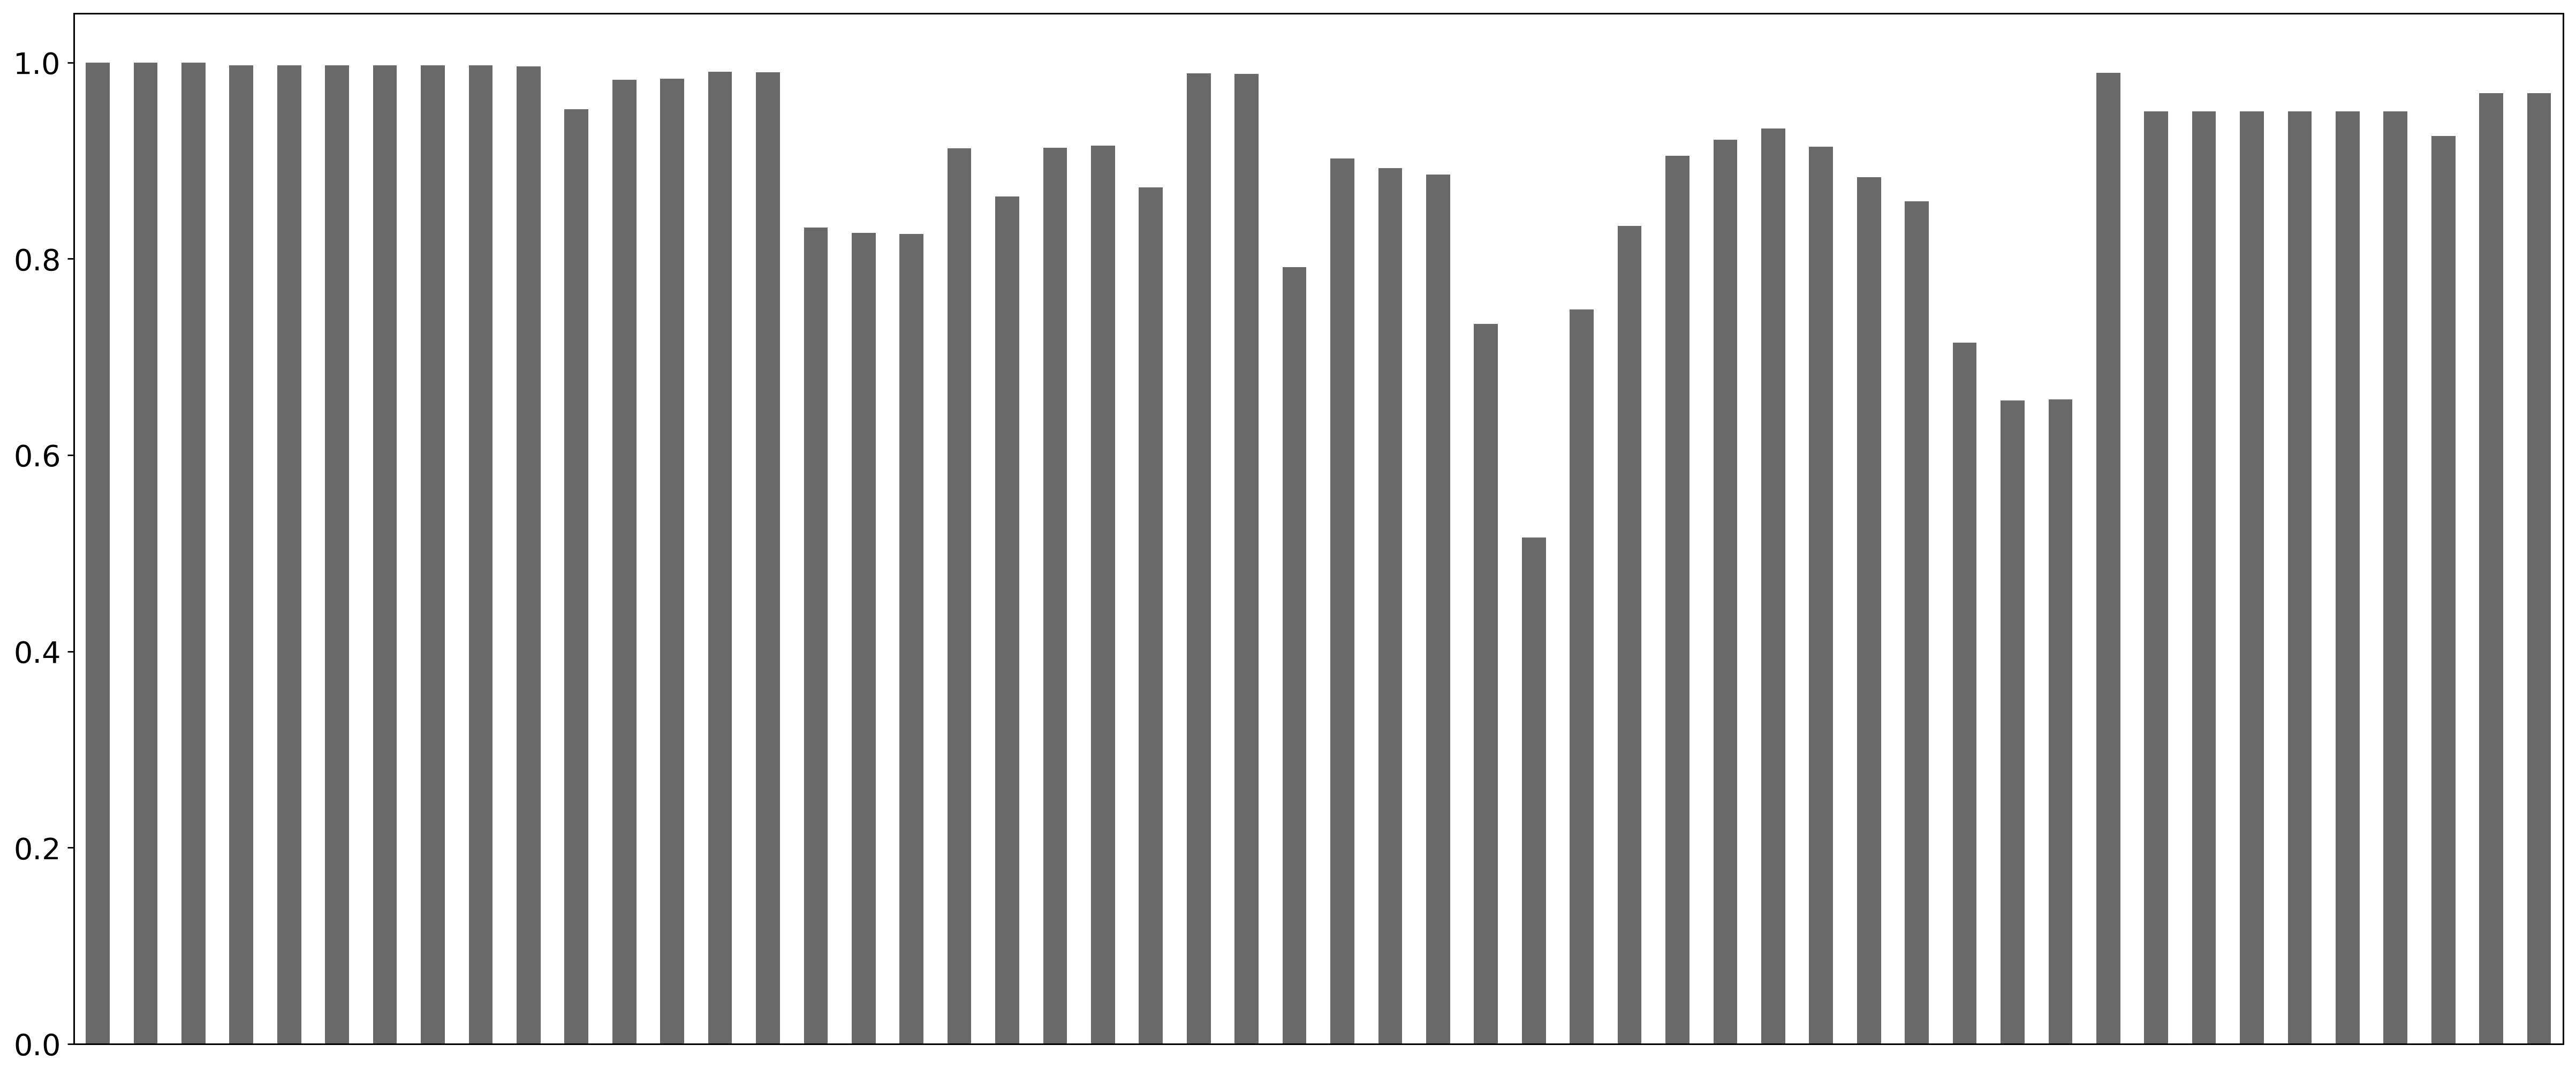

In [20]:
msno.bar(df.select_dtypes(include=['number']))

### What do you notice? 

(https://github.com/ResidentMario/missingno)[Missingno documentation]



In [21]:
dfnum = df[numcols]


In [22]:

#
cols = 3
rows = (dfnum.shape[1] + cols - 1) // cols
fig,axes = plt.subplots(rows,cols,figsize = (15,5 * rows))
axes = axes.flatten()

for i, col in enumerate(dfnum.columns):
    sns.histplot(dfnum[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Freq')

plt.tight_layout()
plt.show()

# what is the problem here? 

/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py

In [23]:
missing_perc_num = dfnum.isnull().mean()*100

missing_perc_num

MCV        0.285889
HGB        0.279082
HCT        0.285889
PLT        0.285889
MCH        0.285889
MCHC       0.285889
RDW        0.381186
MPV        4.778436
LYM        1.783405
MONO       1.674495
EOS        0.918930
BASO       0.993806
NT        16.792594
APTT      17.350759
FIB       17.473283
SODIUM     8.726431
POTASS    13.668232
CA         8.685590
PHOS       8.454156
MG        12.722075
CREA       1.082295
BUN        1.170785
HS        20.835886
GBIL       9.808726
TP        10.775305
ALB       11.408345
AMY       26.635355
PAMY      48.424205
LIP       25.178681
CHE       16.656456
AP         9.529644
ASAT       7.855149
ALAT       6.718399
GGT        8.590293
LDH       11.667007
CK        14.158328
GLU       28.534477
TRIG      34.449663
CHOL      34.340753
CRP        1.055068
BASOR      4.982642
EOSR       4.982642
LYMR       4.982642
MONOR      4.982642
NEU        4.955415
NEUR       4.982642
PDW        7.501191
RBC        3.137976
WBC        3.144783
dtype: float64

In [24]:
dfnum.describe()
#what does this do?

MCV           HGB           HCT           PLT          MCH  \
count  14649.000000  14650.000000  14649.000000  14649.000000  14649.00000   
mean      88.351608     11.568014     34.483077    220.025462     29.57993   
std        6.464330      2.250767      6.510583    122.838591      2.52551   
min       51.000000      3.000000      0.000000      0.000000     14.90000   
25%       84.700000      9.900000     29.800000    140.000000     28.40000   
50%       88.300000     11.400000     34.300000    204.000000     29.70000   
75%       92.000000     13.200000     39.100000    277.000000     31.00000   
max      128.700000     21.000000     66.600000   2092.000000     47.40000   

               MCHC           RDW           MPV           LYM          MONO  \
count  14649.000000  14635.000000  13989.000000  14429.000000  14445.000000   
mean      33.471418     14.997383     10.381829      1.365777      0.852738   
std        1.396581      2.288369      1.009975      7.455851      0.651324   
min       23.700000     10.600000      7.300000      0.000000      0.000000   
25%       32.600000     13.400000      9.700000      0.700000      0.500000   
50%       33.500000     14.500000     10.300000      1.000000      0.800000   
75%       34.400000     16.000000     11.000000      1.600000      1.100000   
max       43.500000     31.800000     15.000000    578.100000     20.400000   

       ...           CRP         BASOR          EOSR          LYMR  \
count  ...  14536.000000  13959.000000  13959.000000  13959.000000   
mean   ...     10.915852      0.145046      1.297427     14.614107   
std    ...      9.580142      0.585119      2.356313     12.735327   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      2.870000      0.000000      0.000000      6.756757   
50%    ...      8.570000      0.000000      0.588235     11.340206   
75%    ...     16.452500      0.000000      1.785714     18.181818   
max    ...     76.320000     23.655914     73.488372    100.000000   

              MONOR           NEU          NEUR           PDW           RBC  \
count  13959.000000  13963.000000  13959.000000  13589.000000  14230.000000   
mean       8.792551      8.366776     75.150869     12.293237      3.935734   
std        5.810241      5.614688     15.529545      2.189426      0.774083   
min        0.000000      0.000000      0.000000      6.600000      1.000000   
25%        5.633803      4.600000     69.230769     10.800000      3.400000   
50%        8.000000      7.300000     78.333333     12.000000      3.900000   
75%       10.869565     10.800000     85.322666     13.400000      4.500000   
max      100.000000     83.800000    100.000000     25.300000      8.200000   

                WBC  
count  14229.000000  
mean      11.227157  
std       12.915017  
min        0.000000  
25%        6.630000  
50%        9.600000  
75%       13.530000  
max      604.470000  

[8 rows x 49 columns]

### Method chaining

- Look at code below.
- What do you think is happening?
- dfnum object has a describe method applied and then transpose method applied too.
- so you are calling two functions.

- In the waiter example, you and your friend want to order x1 sandwich and x1 burger. and you are in a rush, so you then want a bill.
- so you can do 

> today_waiter.take_order('burger')
> today_waiter.take_order('sandwich')
> today_watier.generate_bill()

But instead of this, we can write it more compactly so it is more succinct and more read-able.

> today_waiter.take_order('burger')
   .take_order('sandwich')
   .generate_bill()

# or
> today_waiter
   .take_order('burger')
   .take_order('sandwich')
   .generate_bill()



In [25]:
dfnum.describe().transpose()

count        mean          std     min         25%         50%  \
MCV     14649.0   88.351608     6.464330   51.00   84.700000   88.300000   
HGB     14650.0   11.568014     2.250767    3.00    9.900000   11.400000   
HCT     14649.0   34.483077     6.510583    0.00   29.800000   34.300000   
PLT     14649.0  220.025462   122.838591    0.00  140.000000  204.000000   
MCH     14649.0   29.579930     2.525510   14.90   28.400000   29.700000   
MCHC    14649.0   33.471418     1.396581   23.70   32.600000   33.500000   
RDW     14635.0   14.997383     2.288369   10.60   13.400000   14.500000   
MPV     13989.0   10.381829     1.009975    7.30    9.700000   10.300000   
LYM     14429.0    1.365777     7.455851    0.00    0.700000    1.000000   
MONO    14445.0    0.852738     0.651324    0.00    0.500000    0.800000   
EOS     14556.0    0.114819     0.268836    0.00    0.000000    0.100000   
BASO    14545.0    0.017250     0.081186    0.00    0.000000    0.000000   
NT      12224.0   83.220877    27.153826    4.00   67.000000   83.000000   
APTT    12142.0   40.056399    10.966640   21.40   34.100000   37.700000   
FIB     12124.0  547.364814   208.127651   55.00  397.000000  529.000000   
SODIUM  13409.0  137.211351     4.733792  106.00  135.000000  137.000000   
POTASS  12683.0    4.003012     0.636289    1.92    3.660000    3.950000   
CA      13415.0    2.213796     0.202832    1.03    2.090000    2.220000   
PHOS    13449.0    1.047688     0.396657    0.30    0.810000    0.990000   
MG      12822.0    0.813601     0.151310    0.20    0.720000    0.810000   
CREA    14532.0    1.329305     1.167462    0.26    0.810000    1.000000   
BUN     14519.0   22.656540    18.110156    2.50   11.600000   16.600000   
HS      11630.0    5.412545     2.452495    1.30    3.700000    5.000000   
GBIL    13250.0    1.406278     2.751021    0.11    0.530000    0.770000   
TP      13108.0   64.901411    11.460058   29.90   56.900000   65.700000   
ALB     13015.0   33.424579     7.444180   10.00   27.900000   33.600000   
AMY     10778.0   90.832251   805.232170    8.00   33.000000   49.000000   
PAMY     7577.0   41.658308   448.009828    1.00   14.000000   22.000000   
LIP     10992.0   63.821416   603.894521    0.00   14.000000   23.000000   
CHE     12244.0    4.790396     2.100410    0.98    3.150000    4.600000   
AP      13291.0  118.779550   132.871480   11.00   63.000000   84.000000   
ASAT    13537.0   86.895250   404.690265    3.00   22.000000   31.000000   
ALAT    13704.0   67.662215   311.046751    0.00   16.000000   26.000000   
GGT     13429.0  115.058381   208.984705    3.00   25.000000   49.000000   
LDH     12977.0  331.151653   475.231266   39.00  187.000000  239.000000   
CK      12611.0  385.014353  2241.207538    8.00   42.000000   80.000000   
GLU     10499.0  126.405658    56.905489   19.00   97.000000  113.000000   
TRIG     9630.0  141.707996   120.689747   14.00   83.000000  115.000000   
CHOL     9646.0  150.799917    55.509060   25.00  113.000000  145.000000   
CRP     14536.0   10.915852     9.580142    0.00    2.870000    8.570000   
BASOR   13959.0    0.145046     0.585119    0.00    0.000000    0.000000   
EOSR    13959.0    1.297427     2.356313    0.00    0.000000    0.588235   
LYMR    13959.0   14.614107    12.735327    0.00    6.756757   11.340206   
MONOR   13959.0    8.792551     5.810241    0.00    5.633803    8.000000   
NEU     13963.0    8.366776     5.614688    0.00    4.600000    7.300000   
NEUR    13959.0   75.150869    15.529545    0.00   69.230769   78.333333   
PDW     13589.0   12.293237     2.189426    6.60   10.800000   12.000000   
RBC     14230.0    3.935734     0.774083    1.00    3.400000    3.900000   
WBC     14229.0   11.227157    12.915017    0.00    6.630000    9.600000   

               75%           max  
MCV      92.000000    128.700000  
HGB      13.200000     21.000000  
HCT      39.100000     66.600000  
PLT     277.000000   2092.000000  
MCH      31.000000     47.400000  

### Before executing this code,

Do you understand what is happening here? 

Lets read it together to make sense. 

In [26]:

#
cols = 3
rows = (dfnum.shape[1] + cols - 1) // cols
fig,axes = plt.subplots(rows,cols,figsize = (15,5 * rows))
axes = axes.flatten()

# missing
missing_perc_num = dfnum.isnull().mean() *100

for i, col in enumerate(dfnum.columns):
    sns.histplot(dfnum[col].dropna(), kde=True, ax=axes[i])
    missing_perc = missing_perc_num[col]
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Freq')

    text = f'Missing:{missing_perc:.2f}%'
    props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
    axes[i].text(0.95,0.95,text,transform = axes[i].transAxes,fontsize = 12, verticalalignment='top',horizontalalignment='right',bbox=props)

plt.tight_layout()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py

In [27]:
# what do you make of th error message?
inf_vals = dfnum.apply(lambda x: np.isinf(x).sum() )

inf_vals

MCV       0
HGB       0
HCT       0
PLT       0
MCH       0
MCHC      0
RDW       0
MPV       0
LYM       0
MONO      0
EOS       0
BASO      0
NT        0
APTT      0
FIB       0
SODIUM    0
POTASS    0
CA        0
PHOS      0
MG        0
CREA      0
BUN       0
HS        0
GBIL      0
TP        0
ALB       0
AMY       0
PAMY      0
LIP       0
CHE       0
AP        0
ASAT      0
ALAT      0
GGT       0
LDH       0
CK        0
GLU       0
TRIG      0
CHOL      0
CRP       0
BASOR     0
EOSR      0
LYMR      0
MONOR     0
NEU       0
NEUR      0
PDW       0
RBC       0
WBC       0
dtype: int64

In [ ]:
pplot = sns.pairplot(dfnum.sample(300))
pplot.savefig('pairplot.png')
plt.clf()
#Image(filename='pairplot.png')

### Why do i choose 300-400?

[Frank Harrell](https://www.fharrell.com/post/ml-sample-size/) 

In [28]:
dfcat = df[catcols]

dfcat['BloodCulture'].value_counts()


BloodCulture
no     13511
yes     1180
Name: count, dtype: int64

<Axes: xlabel='BloodCulture'>

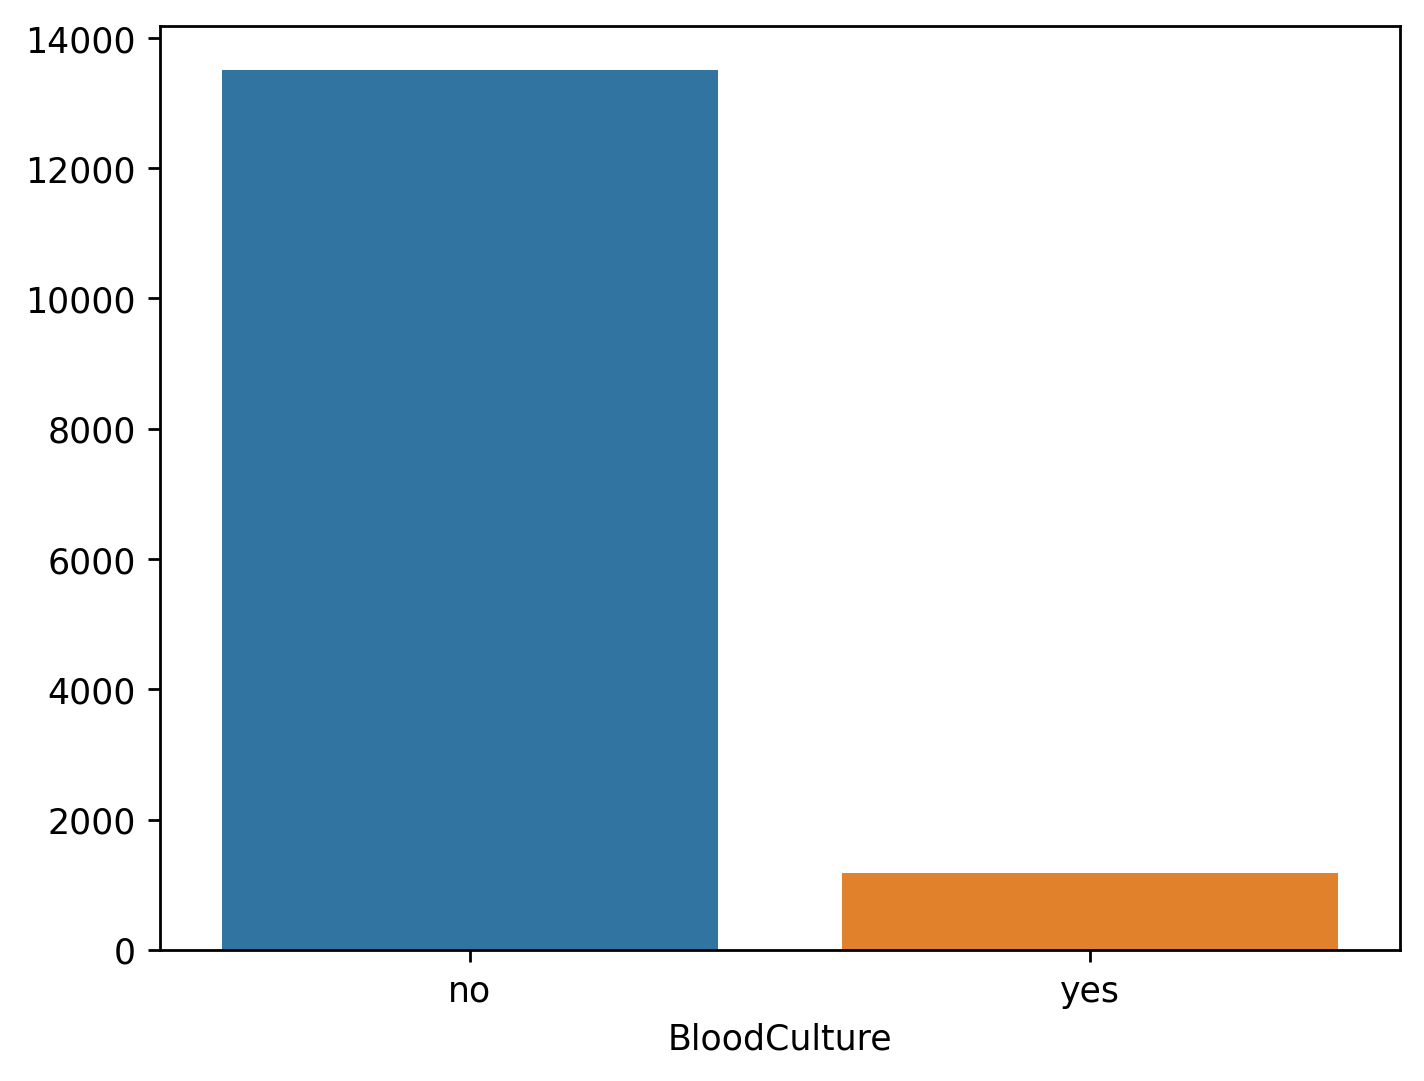

In [29]:
sns.barplot(x=dfcat['BloodCulture'].value_counts().index,y=dfcat['BloodCulture'].value_counts().values)

<Axes: xlabel='SEX'>

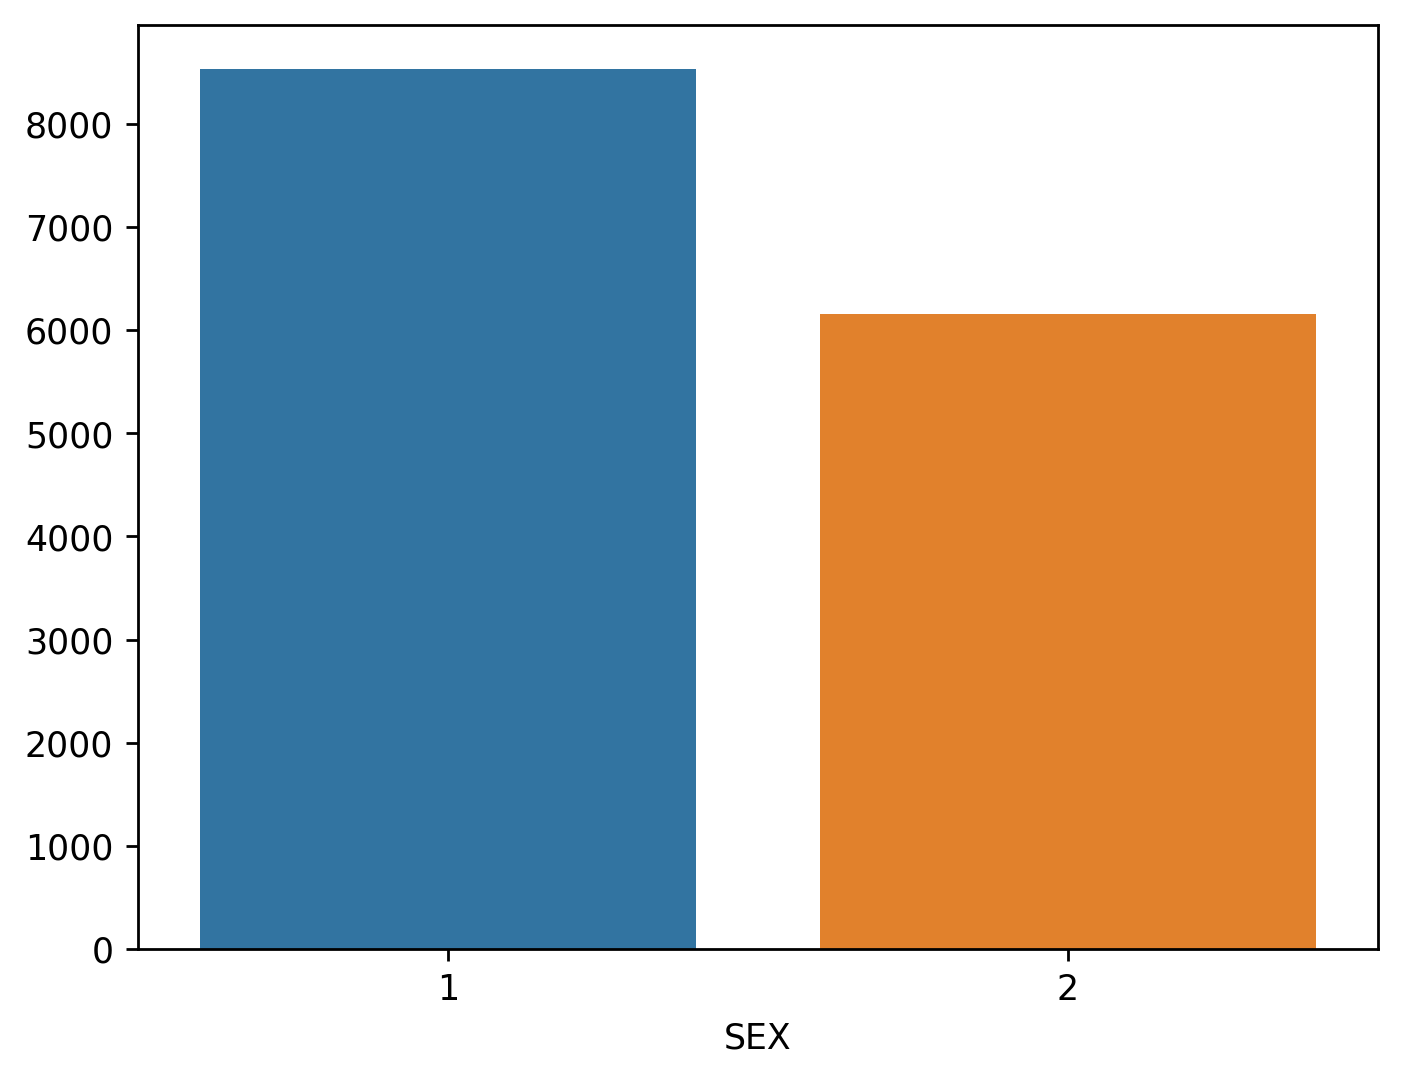

In [30]:
sns.barplot(x=df['SEX'].value_counts().index,y=df['SEX'].value_counts().values)

In [31]:
corr_matrix = dfnum.corr()

In [32]:
corr_matrix

MCV       HGB       HCT       PLT       MCH      MCHC       RDW  \
MCV     1.000000  0.024714  0.010893 -0.148174  0.875396  0.069008 -0.064600   
HGB     0.024714  1.000000  0.958676  0.012558  0.171035  0.316010 -0.443718   
HCT     0.010893  0.958676  1.000000  0.062451  0.059527  0.109804 -0.375513   
PLT    -0.148174  0.012558  0.062451  1.000000 -0.233487 -0.229038 -0.031965   
MCH     0.875396  0.171035  0.059527 -0.233487  1.000000  0.536919 -0.253757   
MCHC    0.069008  0.316010  0.109804 -0.229038  0.536919  1.000000 -0.424933   
RDW    -0.064600 -0.443718 -0.375513 -0.031965 -0.253757 -0.424933  1.000000   
MPV     0.195589  0.068355  0.068739 -0.331666  0.171933  0.019828 -0.000909   
LYM     0.036334  0.005965  0.027495  0.007107 -0.015192 -0.081551  0.032561   
MONO    0.035228  0.025831  0.033950  0.165590  0.005463 -0.045232  0.033060   
EOS     0.008703 -0.026518 -0.017358  0.121011 -0.018628 -0.051781  0.025728   
BASO    0.026053 -0.032951 -0.024120  0.035106 -0.004442 -0.054073  0.108413   
NT     -0.059528  0.104042  0.114929  0.187156 -0.051821 -0.000079 -0.170292   
APTT    0.047102 -0.114725 -0.110371 -0.096817  0.017112 -0.047056  0.155164   
FIB    -0.046338 -0.084858 -0.054772  0.309177 -0.092203 -0.106712 -0.054598   
SODIUM  0.123158  0.006570  0.062439 -0.004680 -0.013107 -0.236143  0.028378   
POTASS  0.053386 -0.027799  0.003810  0.008990 -0.028696 -0.151869  0.104673   
CA     -0.050274  0.428181  0.424934  0.151090 -0.005221  0.076517 -0.227500   
PHOS    0.045449 -0.094354 -0.071011  0.011338 -0.019729 -0.118247  0.139683   
MG      0.045281 -0.005534  0.010271  0.017467 -0.008166 -0.090553  0.035599   
CREA    0.023827 -0.115207 -0.101875 -0.057997 -0.022159 -0.086554  0.148167   
BUN     0.065941 -0.203318 -0.186481 -0.116835 -0.005121 -0.121783  0.264177   
HS      0.020934  0.098930  0.107168 -0.038851 -0.004004 -0.047523  0.091880   
GBIL    0.103937 -0.071440 -0.112724 -0.147507  0.157228  0.134826  0.225954   
TP     -0.110811  0.467534  0.476091  0.252644 -0.072964  0.035985 -0.255946   
ALB    -0.091745  0.586458  0.573982  0.084095  0.000301  0.157511 -0.371316   
AMY    -0.013328 -0.012558 -0.010596  0.046054 -0.016364 -0.009339  0.002120   
PAMY   -0.008785 -0.014228 -0.011682  0.049790 -0.013880 -0.013804  0.008929   
LIP    -0.003924 -0.012916 -0.013806  0.045802 -0.002009  0.002172  0.004052   
CHE    -0.079951  0.566136  0.561475  0.080132 -0.010399  0.120114 -0.378487   
AP     -0.010621 -0.147479 -0.132426  0.094942 -0.057764 -0.098651  0.217722   
ASAT    0.032659 -0.008020 -0.005379 -0.069464  0.025789 -0.003026  0.039416   
ALAT    0.019853  0.002144  0.002026 -0.055787  0.022892  0.012528  0.018255   
GGT     0.107086 -0.098008 -0.092580  0.038509  0.073844 -0.035899  0.152041   
LDH     0.027176 -0.051830 -0.045508 -0.104014  0.009578 -0.024775  0.097011   
CK      0.001752  0.019483  0.016954 -0.064306  0.014149  0.025443 -0.020968   
GLU     0.006306  0.018634  0.024995 -0.009409 -0.009415 -0.026876 -0.022085   
TRIG    0.013615 -0.033498 -0.036797 -0.019932  0.021608  0.025774  0.068773   
CHOL   -0.013852  0.329988  0.328572  0.177845  0.012821  0.050035 -0.172019   
CRP    -0.022109 -0.202656 -0.197641  0.015243 -0.035932 -0.032020  0.067874   
BASOR   0.018214  0.003551  0.012340  0.054388 -0.003901 -0.039325  0.071961   
EOSR    0.006281 -0.032428 -0.025790  0.072333 -0.017484 -0.045831  0.017710   
LYMR   -0.003684  0.024963  0.006340 -0.116323  0.043410  0.094731 -0.069738   
MONOR   0.014214 -0.034382 -0.050868 -0.074004  0.043971  0.066712  0.010629   
NEU    -0.003922  0.025989  0.045579  0.250568 -0.044644 -0.084338  0.060748   
NEUR   -0.003936 -0.002821  0.017280  0.110057 -0.049251 -0.094210  0.047822   
PDW     0.110049  0.100276  0.107534 -0.318729  0.086656 -0.007311  0.042866   
RBC    -0.346484  0.891805  0.918795  0.104499 -0.256948  0.075481 -0.307288   
WBC     0.042643 -0.018651  0.003871  0.083916 -0.017000 -0.100361  0.107292   

            

In [34]:
highly_correlated = check_high_corr(dfnum)

In [35]:
highly_correlated
# this is useful to know 

MCV   MCH      0.875396
HGB   HCT      0.958676
      RBC      0.891805
HCT   RBC      0.918795
MPV   PDW      0.931685
LYM   WBC      0.781414
EOS   EOSR     0.812899
BASO  BASOR    0.762422
TP    ALB      0.761835
ALB   CHE      0.729404
AMY   PAMY     0.784342
      LIP      0.822039
ASAT  ALAT     0.817744
      LDH      0.756194
LYMR  NEUR     0.911490
NEU   WBC      0.931181
dtype: float64

In [48]:
lv = low_vars(dfnum,threshold = 2)

# what variance threshold to set at? 

In [49]:
lv 

Column  Variance
5     MCHC  1.950304
7      MPV  1.019976
9     MONO  0.424194
10     EOS  0.072268
11    BASO  0.006591
16  POTASS  0.404832
17      CA  0.041138
18    PHOS  0.157325
19      MG  0.022893
20    CREA  1.362874
40   BASOR  0.342339
47     RBC  0.599162

## What variance threshold to sat at ?

I mean 'what is variance' 
> Formula
> $$ S^{2} = \frac{\sum (x_{i} - \bar{x})^2}{n-1} $$

This looks scary and complicated. 
Lets unpack this.
On left hand side is S squared which is variance.
Right hand side, you divide it by n-1 (sample size -1). Anyone know why not n? **There is a whole entire reason fur sample mean and population mean and the biases, [Link on stack exchange](https://stats.stackexchange.com/questions/3931/intuitive-explanation-for-dividing-by-n-1-when-calculating-standard-deviation)
So big Sigma is just means add all together. 
The parentehsis is xi for each x value, minus its mean. 
We dont want numbers cancelling out hence squaring it.

A worked example.

height = [150, 200, 180, 145, 168 , 175]
n = 6
mean = (150+200+180+145+168+175) / 6 = 1018 / 6 = 169 cm
variance = (150-168)^2+(200-168)^2 + .... (175-168)^2  .. divide by 5 
lets do this in python

What is the unit of 'variance' 

Whilst we are at it, 
lets go through 'standard deviation'.

$$ S = \sqrt{\frac{\sum (x_{i} - \bar{x})^2}{n-1}} $$

Why SD and not Variance?


In [66]:
height = [150, 165, 170, 185, 190, 200]
mean = sum(height)/len(height)
print(f'mean is {mean:.2f}')
squared = [(x-mean)**2 for x in height]
v = sum(squared) / 5
print(f'variance is {v:.2f}')
sd = np.sqrt(v)
print(f'sd is {sd:.2f}')

mean is 176.67
variance is 336.67
sd is 18.35


/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

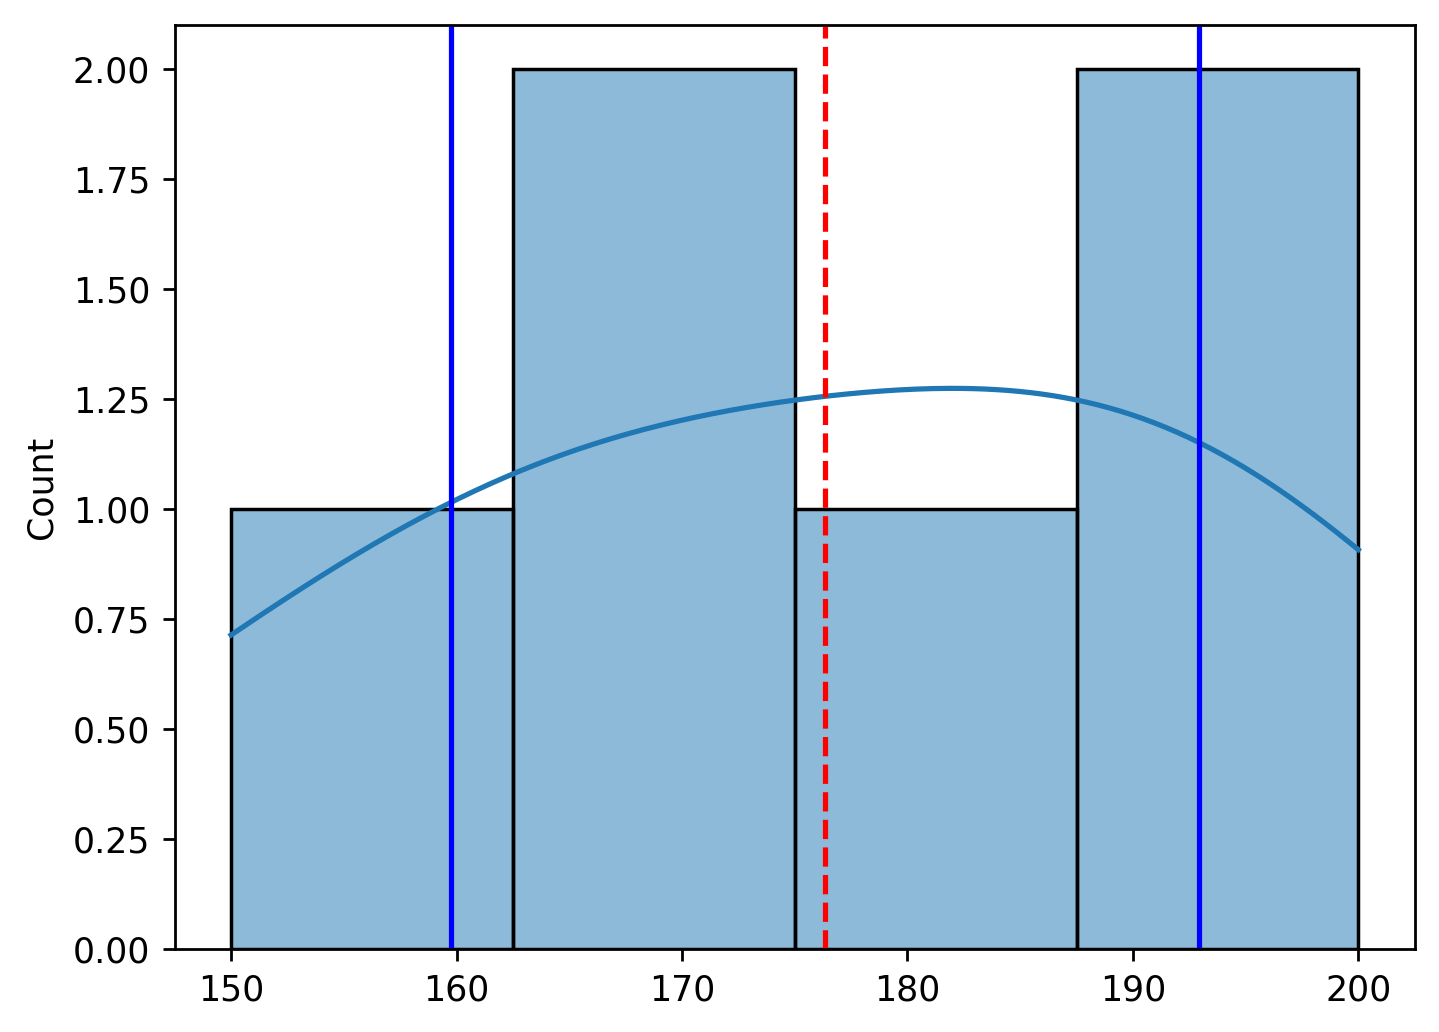

In [76]:
# graphical intuition

plt2 = sns.histplot(height,kde=True)
plt2.axvline(mean, color = 'red', linestyle = 'dashed')
plt2.axvline(mean + sd, color = 'blue',linestyle ='solid')
plt2.axvline(mean - sd, color = 'blue',linestyle = 'solid')
plt2

176.36
275.3004
16.592178880424356


/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

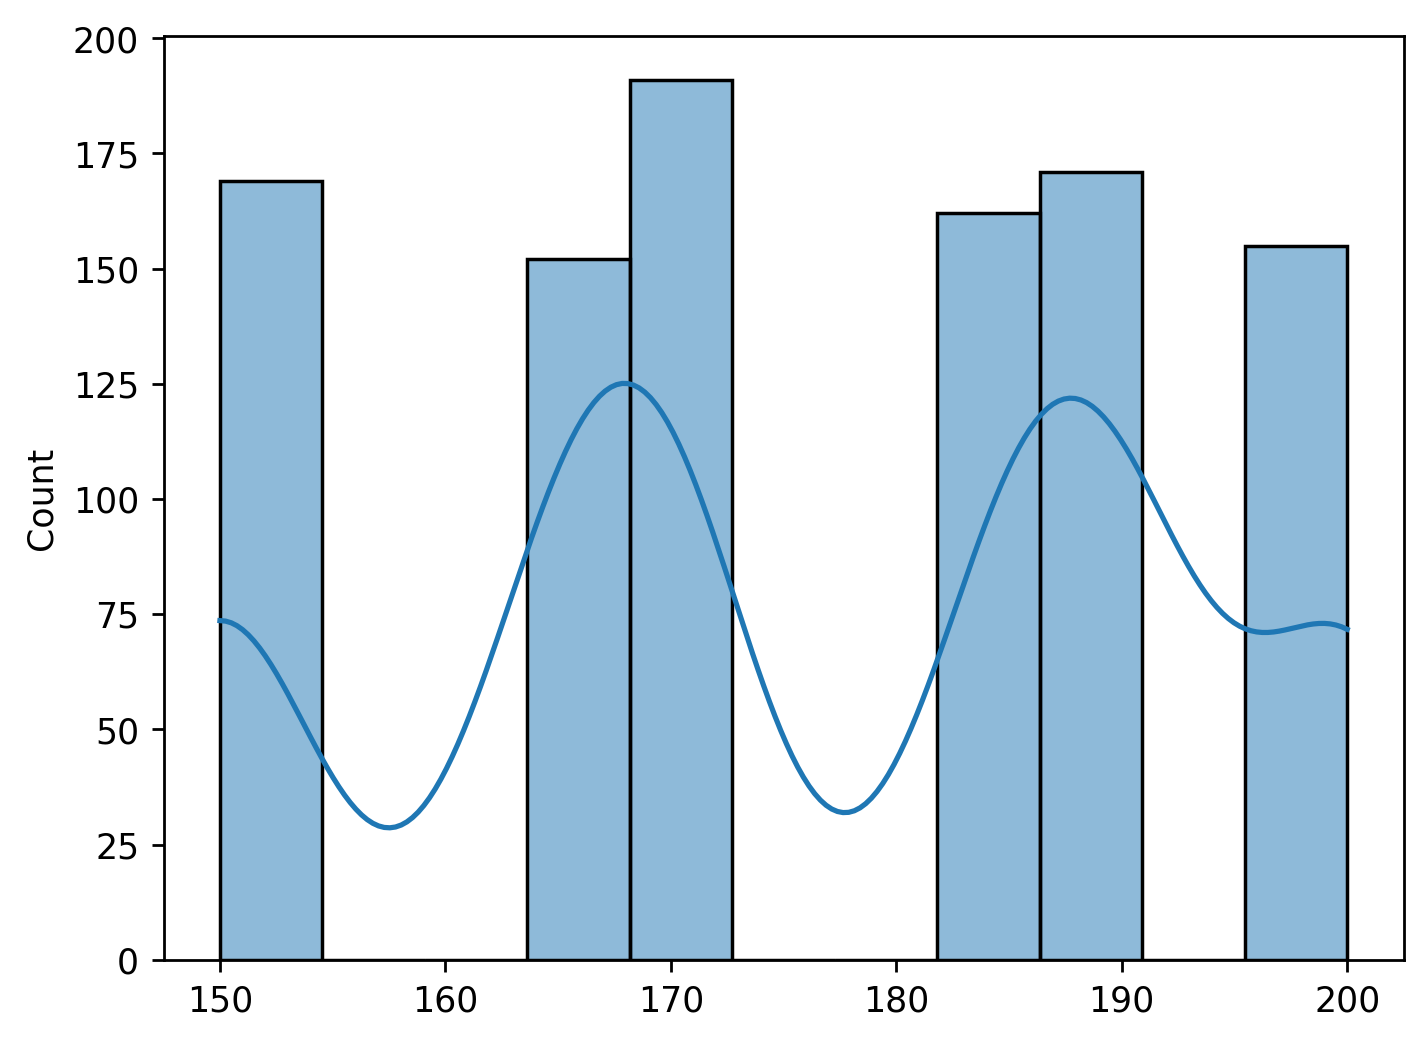

In [69]:
# One omre trick
resampled = random.choices(height,k=1000)
mean = np.mean(resampled)
var = np.var(resampled)
sd = np.std(resampled)
print(mean)
print(var)
print(sd)

plt3 = sns.histplot(resampled,kde=True)
plt3


In [77]:
# Why would you want to remove low variance variables?

In [ ]:
# Lets do heiarchial clustering of numerical variables

# first we need to scale the data

# What is scaling the data?

Why would you want to scale data?

x1 = [1,2,3]
x2  = [2000,3000,4000]
y = [250,350,400]

Anything that uses distance measure? 
How far are the points? 

Any thought? 


# Need an example of Euclidean distance 

In [88]:
# 
scaler = StandardScaler()
scaled_dfnum = scaler.fit_transform(dfnum)
scaled_dfnum

# what happened here? 
# what do you think about the output? 

array([[ 1.69372015, -0.03021902,  0.2176412 , ..., -0.77339894,
        -0.30454444,  0.99676959],
       [-0.50302484, -0.56338888,  0.03331961, ..., -0.40799287,
        -0.04616511,  0.07300623],
       [ 1.2296191 , -1.85188271, -1.79453621, ...,  0.82525264,
        -1.85482041,  0.48184701],
       ...,
       [-0.31738442, -0.82997381, -0.47356478, ..., -1.36718382,
        -0.17535477,  0.01260929],
       [ 0.03842639, -0.03021902, -0.28924318, ...,  0.82525264,
        -0.30454444, -0.14922352],
       [-1.41575692,  0.32522755,  0.1715608 , ..., -0.68204742,
         0.59978322, -0.60142621]])

In [89]:
# Hclust agglo

agclust_model_1 = AgglomerativeClustering(distance_threshold= 0,n_clusters=None)
agclust_model_1 = agclust_model_1.fit(scaled_dfnum)
agclust_model_1

ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [90]:
df_num_drop = dfnum.dropna()
df_num_drop

MCV   HGB   HCT    PLT   MCH  MCHC   RDW   MPV  LYM  MONO  ...  \
0       99.3  11.5  35.9  307.0  31.5  31.8  19.5  10.8  0.4   1.7  ...   
3       91.3  10.3  31.1  309.0  30.4  33.3  13.8   8.5  1.3   0.8  ...   
5      104.5  15.7  46.9  144.0  34.8  33.5  13.9  10.9  2.2   0.9  ...   
9       83.0  10.3  30.1  105.0  28.6  34.1  13.2  11.3  0.9   0.9  ...   
10      86.5   9.1  28.0  216.0  28.3  32.9  15.7  10.9  0.7   0.6  ...   
...      ...   ...   ...    ...   ...   ...   ...   ...  ...   ...  ...   
14677   91.6  10.0  31.0  119.0  29.5  32.2  15.2  10.6  0.7   0.5  ...   
14682   81.9  14.7  41.2  255.0  29.4  35.9  12.3   9.5  1.9   1.1  ...   
14684   87.5  10.4  29.8  217.0  31.0  35.3  12.4   9.7  1.4   2.0  ...   
14689   88.6  11.5  32.6  262.0  31.0  35.0  16.4  11.6  1.3   1.0  ...   
14690   79.2  12.3  35.6  192.0  27.5  34.7  12.2   9.5  1.3   0.6  ...   

         CRP     BASOR      EOSR       LYMR      MONOR   NEU       NEUR   PDW  \
0       3.94  0.413223  0.000000   1.652893   7.024793  22.0  90.909091  10.6   
3       3.78  0.000000  0.000000  11.016949   6.779661   9.7  82.203390   8.7   
5       5.89  0.000000  1.000000  22.000000   9.000000   6.8  68.000000  12.9   
9       3.80  1.666667  5.000000  15.000000  15.000000   3.8  63.333333  13.2   
10      3.04  1.041667  0.000000   7.291667   6.250000   8.2  85.416667  12.0   
...      ...       ...       ...        ...        ...   ...        ...   ...   
14677  22.33  0.000000  1.886792  13.207547   9.433962   4.0  75.471698  12.5   
14682   7.88  0.000000  0.000000  13.013699   7.534247  11.6  79.452055  11.1   
14684  11.85  0.000000  1.063830  14.893617  21.276596   5.9  62.765957  10.5   
14689  11.18  0.000000  2.127660  13.829787  10.638298   6.9  73.404255  14.1   
14690   1.00  2.941176  0.000000  38.235294  17.647059   1.4  41.176471  10.8   

       RBC    WBC  
0      3.7  24.10  
3      3.5  11.58  
5      4.3   9.94  
9      3.5   5.98  
10     3.3   9.45  
...    ...    ...  
14677  3.6   5.40  
14682  5.0  14.63  
14684  3.3   9.41  
14689  3.7   9.30  
14690  4.4   3.46  

[3979 rows x 49 columns]

In [91]:
scaled_dfnum_nona = scaler.fit_transform(df_num_drop)
agclust_model_1 = AgglomerativeClustering(distance_threshold= 0,n_clusters=None)
agclust_model_1 = agclust_model_1.fit(scaled_dfnum_nona)
agclust_model_1

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [119]:
distmatrix = pdist(scaled_dfnum_nona)
linkmatrix = linkage(distmatrix,method='ward')

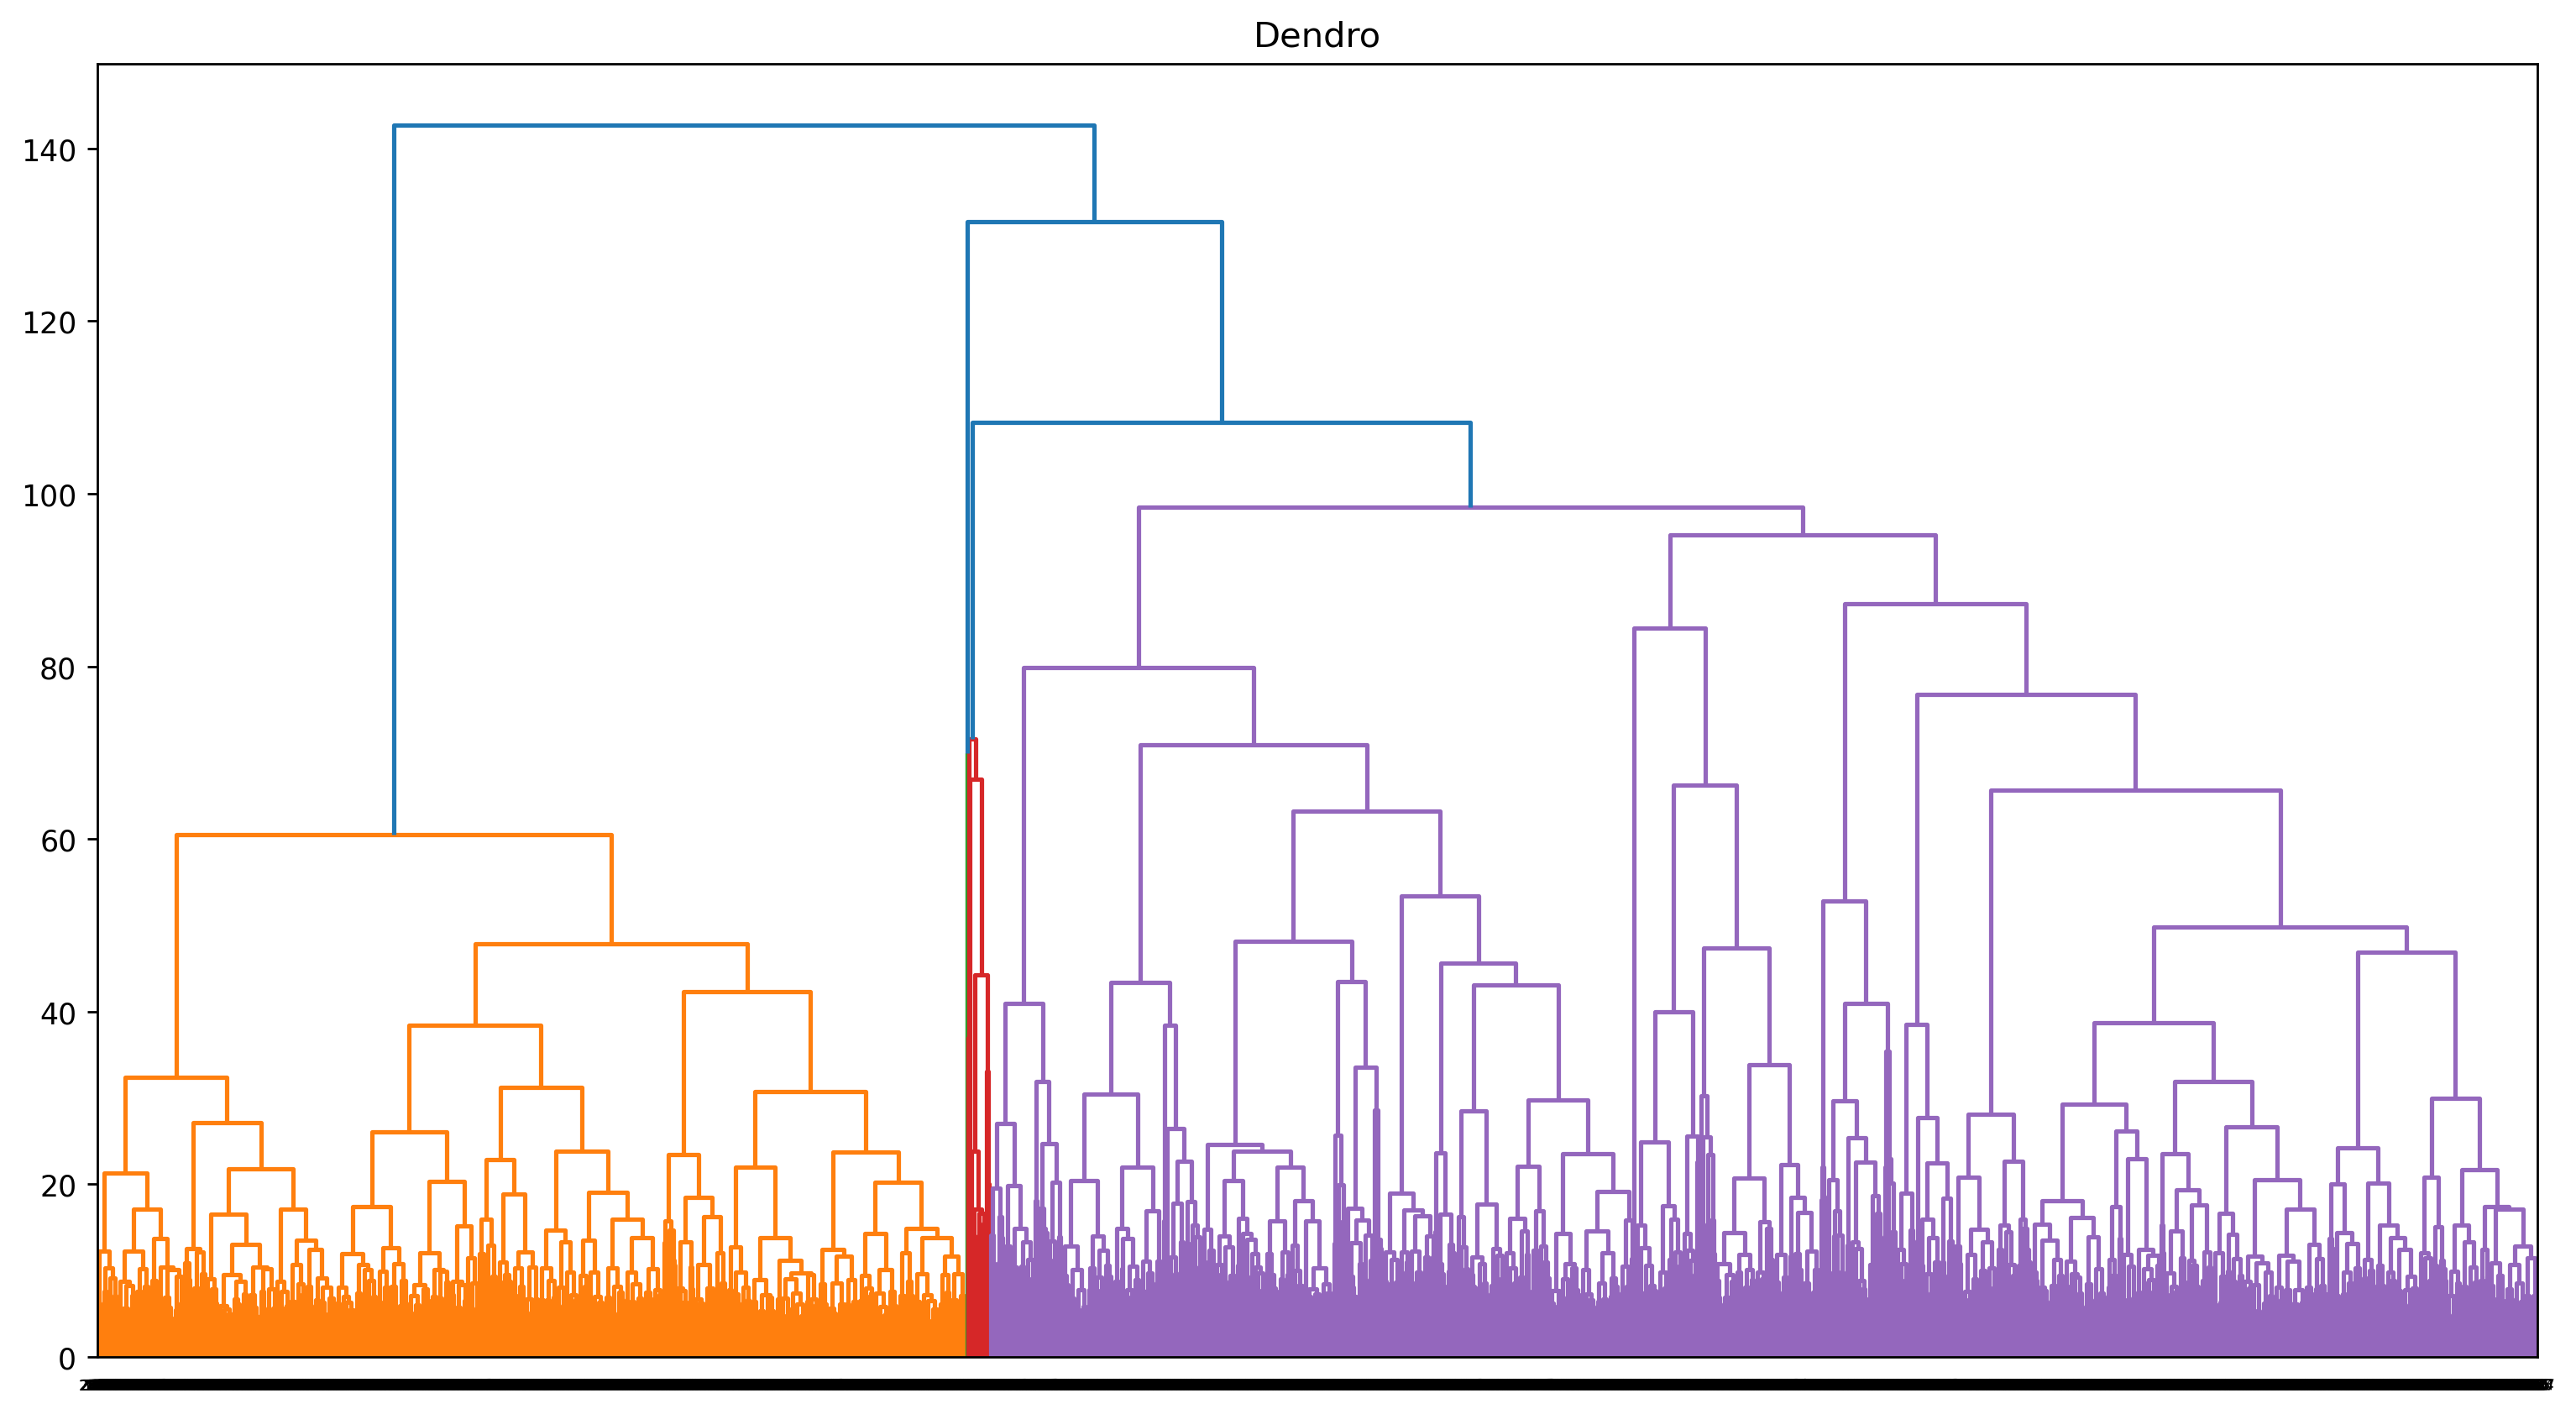

In [123]:
plt.figure(figsize = (15,8))
dn = dendrogram(linkmatrix,leaf_rotation=True)
plt.title("Dendro")
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/homebrew/Caskroom/miniconda/base/envs/exp24/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


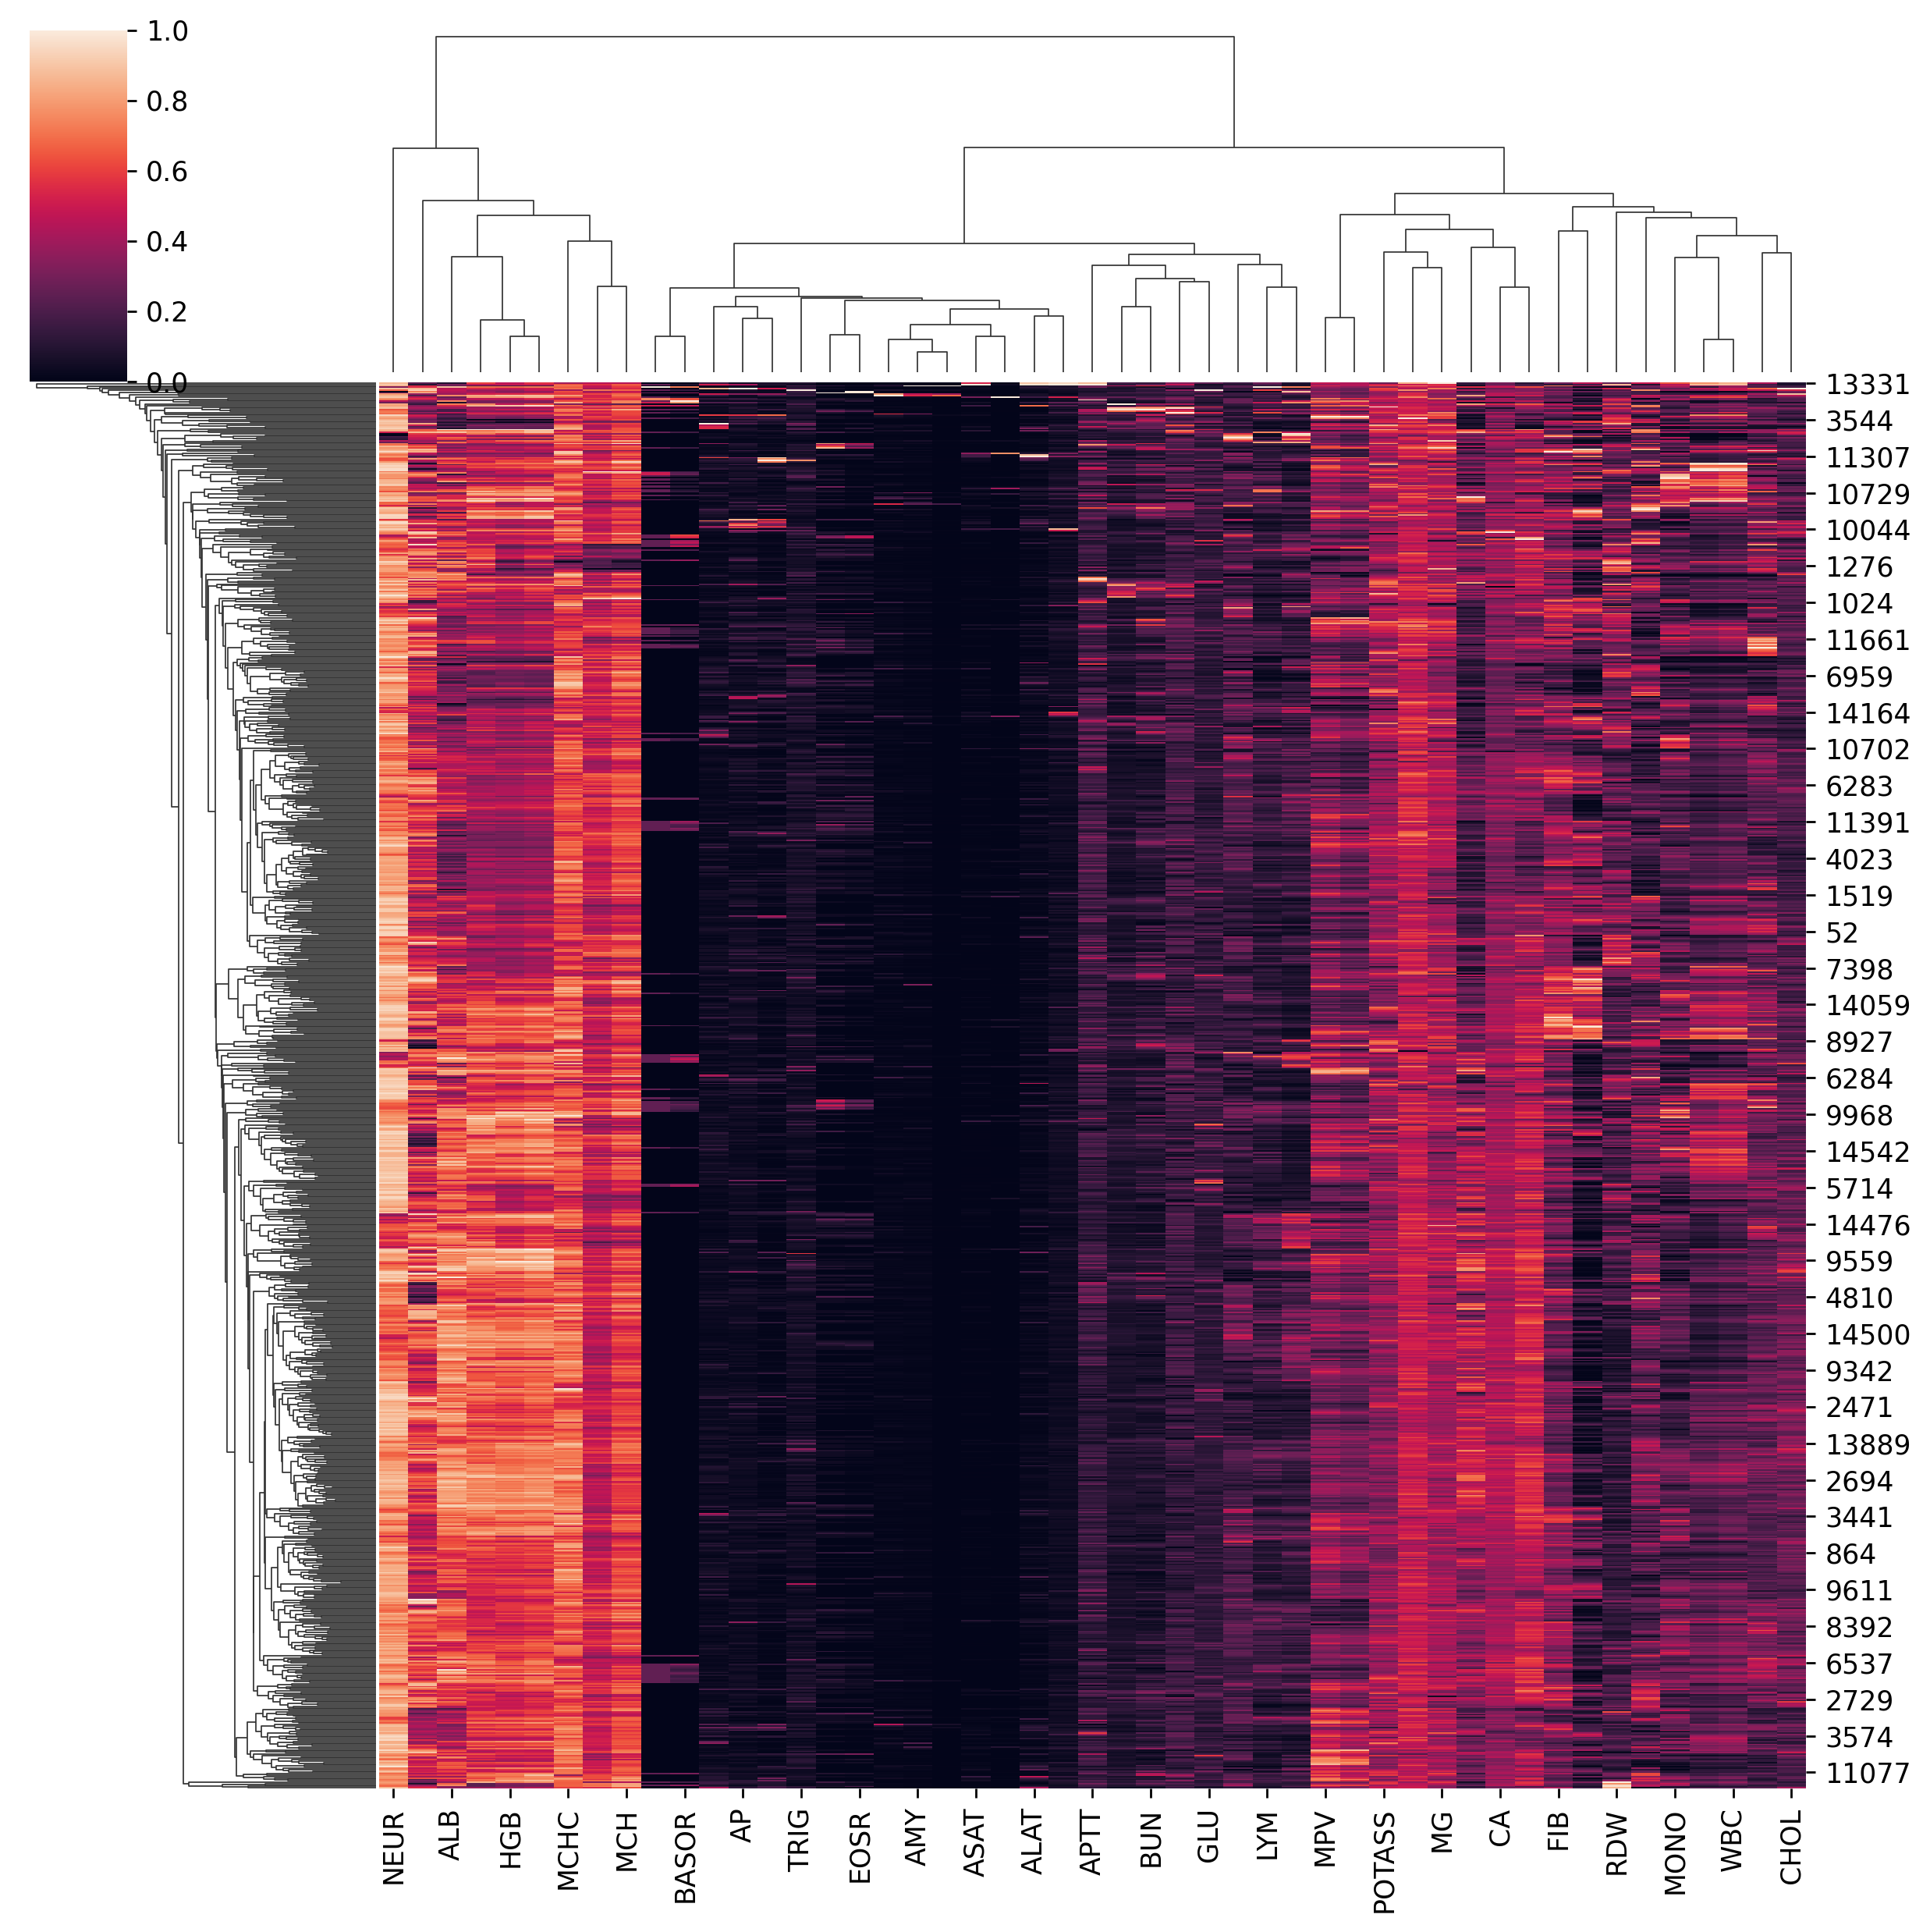

In [130]:
sns.clustermap(df_num_drop.sample(1000),standard_scale=1)

In [105]:
url = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/mtcars.csv'
mtcars = pd.read_csv(url)
#df = df.set_index('model')
mtcars

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  \
0             Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1   
1         Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1   
2            Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1   
3        Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0   
4     Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0   
5               Valiant  18.1    6  225.0  105  2.76  3.460  20.22   1   0   
6            Duster 360  14.3    8  360.0  245  3.21  3.570  15.84   0   0   
7             Merc 240D  24.4    4  146.7   62  3.69  3.190  20.00   1   0   
8              Merc 230  22.8    4  140.8   95  3.92  3.150  22.90   1   0   
9              Merc 280  19.2    6  167.6  123  3.92  3.440  18.30   1   0   
10            Merc 280C  17.8    6  167.6  123  3.92  3.440  18.90   1   0   
11           Merc 450SE  16.4    8  275.8  180  3.07  4.070  17.40   0   0   
12           Merc 450SL  17.3    8  275.8  180  3.07  3.730  17.60   0   0   
13          Merc 450SLC  15.2    8  275.8  180  3.07  3.780  18.00   0   0   
14   Cadillac Fleetwood  10.4    8  472.0  205  2.93  5.250  17.98   0   0   
15  Lincoln Continental  10.4    8  460.0  215  3.00  5.424  17.82   0   0   
16    Chrysler Imperial  14.7    8  440.0  230  3.23  5.345  17.42   0   0   
17             Fiat 128  32.4    4   78.7   66  4.08  2.200  19.47   1   1   
18          Honda Civic  30.4    4   75.7   52  4.93  1.615  18.52   1   1   
19       Toyota Corolla  33.9    4   71.1   65  4.22  1.835  19.90   1   1   
20        Toyota Corona  21.5    4  120.1   97  3.70  2.465  20.01   1   0   
21     Dodge Challenger  15.5    8  318.0  150  2.76  3.520  16.87   0   0   
22          AMC Javelin  15.2    8  304.0  150  3.15  3.435  17.30   0   0   
23           Camaro Z28  13.3    8  350.0  245  3.73  3.840  15.41   0   0   
24     Pontiac Firebird  19.2    8  400.0  175  3.08  3.845  17.05   0   0   
25            Fiat X1-9  27.3    4   79.0   66  4.08  1.935  18.90   1   1   
26        Porsche 914-2  26.0    4  120.3   91  4.43  2.140  16.70   0   1   
27         Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.90   1   1   
28       Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.50   0   1   
29         Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.50   0   1   
30        Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.60   0   1   
31           Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.60   1   1   

    gear  carb  
0      4     4  
1      4     4  
2      4     1  
3      3     1  
4      3     2  
5      3     1  
6      3     4  
7      4     2  
8      4     2  
9      4     4  
10     4     4  
11     3     3  
12     3     3  
13     3     3  
14     3     4  
15     3     4  
16     3     4  
17     4     1  
18     4     2  
19     4     1  
20     3     1  
21     3     2  
22     3     2  
23     3     4  
24     3     2  
25     4     1  
26     5     2  
27     5     2  
28     5     4  
29     5     6  
30     5     8  
31     4     2

In [104]:
linked = linkage(scaled_dfnum_nona,metric ='correlation',method = 'complete')

dendrogram(linked, leaf_rotation = 90, labels = scaled_dfnum_nona.index)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [ ]:
# What do you do next?

#1. answer(you can visualise)

#2. or you can sum
sum(inf_vals)

# The questions you want to know for EDA
1. how large is the dataset
2. how are the variables coded? 
2.1. Are they in correct format and datatypes? especially datetime, Lets correct the data types
3. Are there any duplicates?
4. Are there any missing data?
4.1. What is the distribution of missing data? or null values
4.2. How is it missing?
4.3. How are the missing data coded?
5. What are the distributions of the data?
5.1. continuous variables?
5.2. categorical variables?
5.3. time?
6. What are the correlations between the variables?
6.1. between continuous variables
6.2. between categorical variables
6.3. with Y 
7. What are the relationships between the variables?
7.1. heiarchial clustering "bottom up approach" vs "top down" and heat maps 
8. What are the 'engineered variables' or what variables could be feature engineered? 
8.1. more explicitly, which variables are ratios and their floor and ceiling effects.
9. Which variables explain the variance of the dataset? 
9.1. which variables have very small 'variance'. what do you want to do with them? 
10. What are the outliers?  
10.1. Are they actual or factoid? 
10.2. Why are there no outliers? Are we having a floor or ceiling effect?



# Final Question

- What sort of modelling approach would you take?
- How do we do it? 
- Find out more in the next module.

# What insights did you glean from this EDA?
- the data set Y seems balanced. (Even if imbalance that is fine)
- sex is the only categorical value
- all other are numeric
- there are a lot of missing data
- missing data appears to be random
- missing data correlation seems to be associated with the battery testing (e.g., FBC runs Plt, MVP, etc)
- Fibrinogen is only one that looks bi-modal, all other look uni-modal but note Fib is missing in 17%
- significant correlation in some of the data sets 
- quite a bit of low variance values - need removal

